# Chương 1: Linear Regression With Time Series
 > Sử dụng hai đặc trưng độc đáo của chuỗi thời gian: độ trễ (lags) và bước thời gian (time steps).



1. Chuỗi thời gian là gì?


Là một tập hợp các quan sát được ghi lại theo thời gian.

In [ ]:
import pandas as pd

df = pd.read_csv(
    "book_sales.csv",
    index_col='Date',
    parse_dates=['Date'],
).drop('Paperback', axis=1)

df.head()

Hardcover
Date                 
2000-04-01        139
2000-04-02        128
2000-04-03        172
2000-04-04        139
2000-04-05        191

Chuỗi này ghi lại số lượng sách bìa cứng bán được tại một cửa hàng bán lẻ trong vòng 30 ngày. Hãy chú ý rằng chúng ta có một cột duy nhất các quan sát Hardcover với một chỉ mục thời gian Date.

2. Linear Regression with Time Series


Thuật toán hồi quy tuyến tính học cách tạo ra một tổng có trọng số từ các đặc trưng đầu vào của nó. Với hai đặc trưng, ta sẽ có:

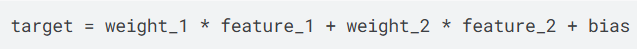

mục tiêu = trọng số_1 × đặc trưng_1 + trọng số_2 × đặc trưng_2 + hệ số chệch (bias)


Trong quá trình huấn luyện, thuật toán hồi quy sẽ học các giá trị cho các tham số trọng số_1, trọng số_2 và bias sao cho phù hợp nhất với mục tiêu (target). (Thuật toán này thường được gọi là bình phương tối tiểu thông thường – ordinary least squares – vì nó chọn các giá trị sao cho sai số bình phương giữa giá trị thực và giá trị dự đoán là nhỏ nhất.)

Các trọng số còn được gọi là hệ số hồi quy (regression coefficients) và bias còn được gọi là hệ số chặn (intercept), vì nó cho ta biết đồ thị hàm số này cắt trục tung (trục y) ở đâu.

3. Đặc trưng bước thời gian (Time-step features)

  > Đặc trưng bước thời gian (time-step features)

  > Đặc trưng độ trễ (lag features)

- Time-step features là (là đặc trưng từ chính thứ tự thời gian) những đặc trưng mà ta có thể suy ra trực tiếp từ chỉ mục thời gian (time index). Đặc trưng đơn giản nhất là "biến thời gian giả" (time dummy), là số đếm các bước thời gian trong chuỗi từ đầu đến cuối.

Dùng nó để mô hình hiểu: vị trí trong thời gian có ảnh hưởng đến kết quả.


In [ ]:
import numpy as np

df['Time'] = np.arange(len(df.index))

df.head()

Hardcover  Time
Date                       
2000-04-01        139     0
2000-04-02        128     1
2000-04-03        172     2
2000-04-04        139     3
2000-04-05        191     4

Hồi quy tuyến tính với biến thời gian giả tạo ra mô hình:


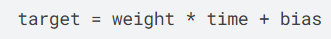

- Tại sao lại cần cột Time?

Ví dụ: Thấy doanh số tăng dần về cuối tháng, thì cột Time sẽ giúp mô hình hiểu xu hướng "càng về sau càng tăng".

Khi huấn luyện mô hình hồi quy:

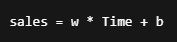

Mô hình sẽ học rằng Time tăng ⇒ sales tăng (nếu w > 0)

Dự đoán được xu hướng tương lai, ví dụ:

Nếu Time = 30, dự đoán bán 200 quyển

Nếu Time = 31, dự đoán bán 210 quyển...

Biến thời gian giả (time dummy) giúp ta khớp đường cong (curve) với chuỗi thời gian trên đồ thị, nơi trục x là thời gian.

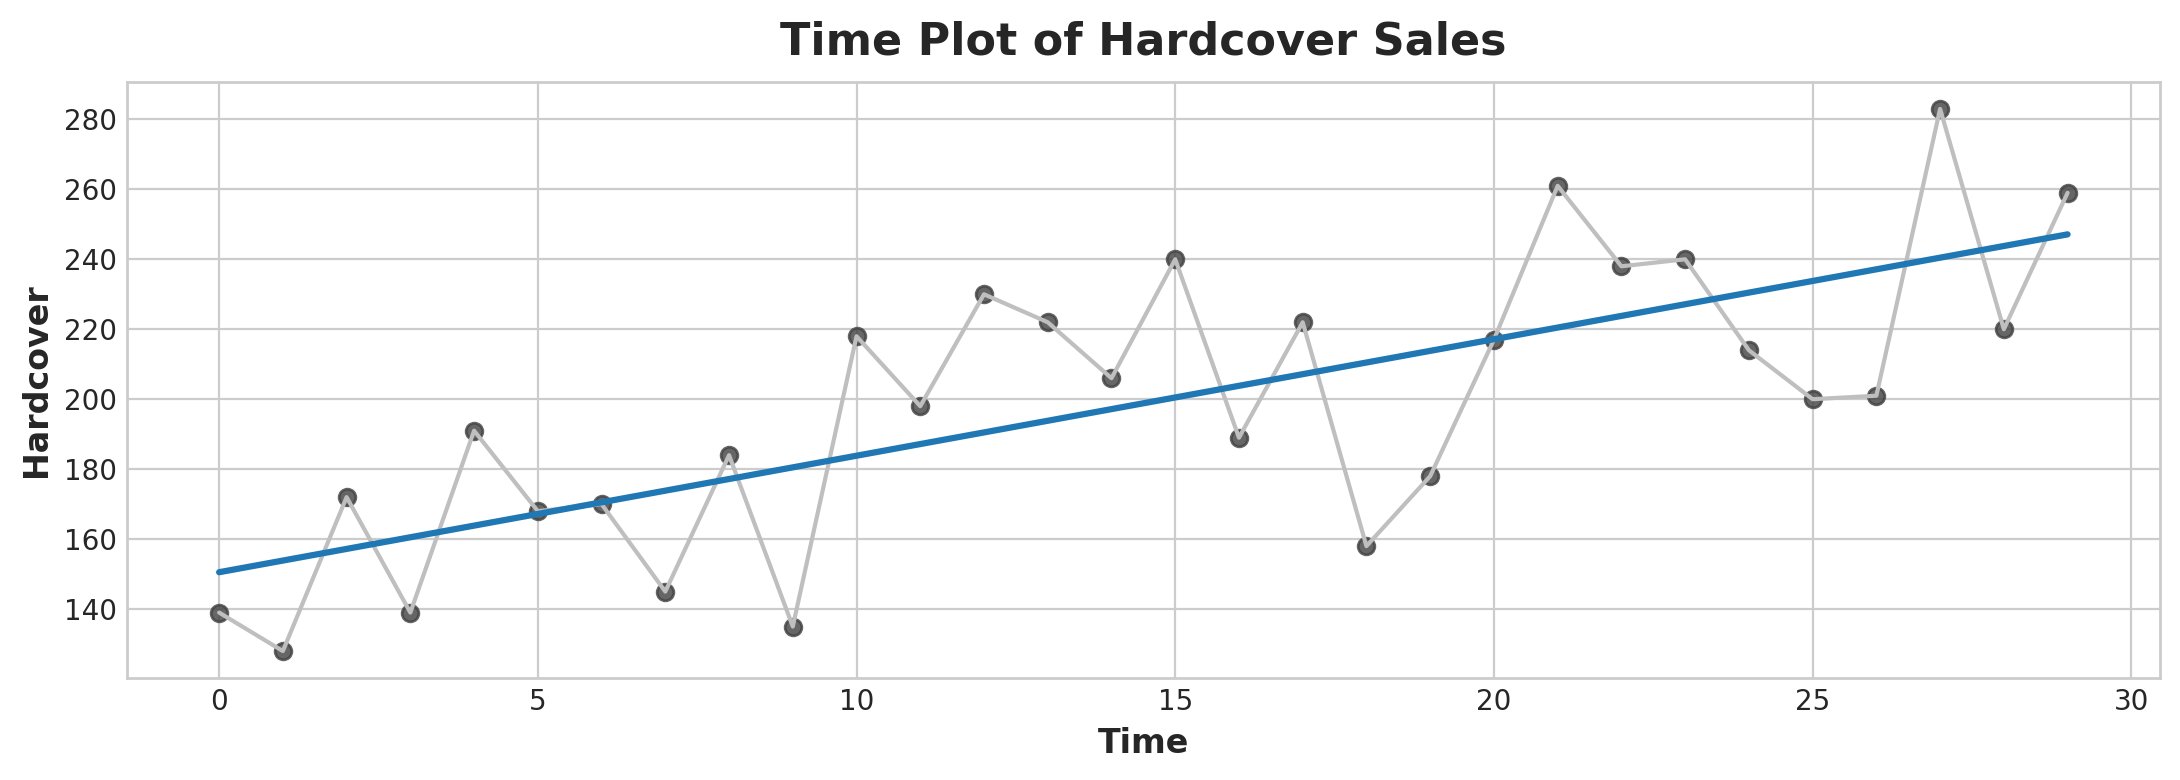

Time-step features cho phép bạn mô hình hóa sự phụ thuộc theo thời gian. Một chuỗi được gọi là phụ thuộc thời gian (time dependent) nếu các giá trị của nó có thể được dự đoán từ thời điểm mà chúng xảy ra.
Trong chuỗi doanh số sách bìa cứng, ta có thể dự đoán rằng doanh số cuối tháng nói chung cao hơn đầu tháng.

- Đặc trưng độ trễ (Lag features)

Lag feature là giá trị quá khứ của target.

Để tạo ra một đặc trưng độ trễ, ta dịch các quan sát của chuỗi mục tiêu (target) sao cho chúng trông như thể đã xảy ra muộn hơn trong thời gian.
Ở đây, chúng ta đã tạo ra một đặc trưng độ trễ 1 bước (1-step lag feature), mặc dù việc dịch nhiều bước cũng là điều hoàn toàn có thể.

In [ ]:
df['Lag_1'] = df['Hardcover'].shift(1)
df = df.reindex(columns=['Hardcover', 'Lag_1'])

df.head()

Hardcover  Lag_1
Date                        
2000-04-01        139    NaN
2000-04-02        128  139.0
2000-04-03        172  128.0
2000-04-04        139  172.0
2000-04-05        191  139.0

Lag_1 = giá trị bán ngày hôm trước

Hồi quy tuyến tính với một đặc trưng độ trễ tạo ra mô hình:


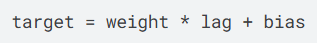

các đặc trưng độ trễ cho phép chúng ta khớp đường cong với các đồ thị độ trễ (lag plots) – nơi mỗi quan sát trong chuỗi được vẽ ra so với quan sát trước đó.

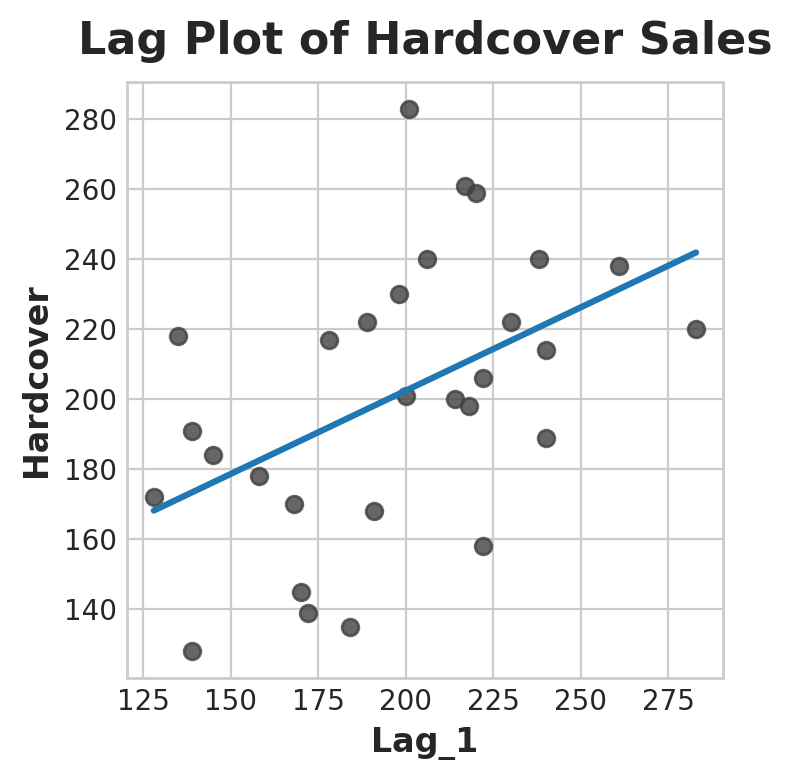

- Tại sao cần dùng lag feature?

Vì giá trị hôm nay thường phụ thuộc vào hôm qua (hoặc vài ngày trước).

Nếu hôm qua bán chạy → hôm nay có khả năng cao cũng bán chạy.

Nhịp độ này lặp lại → mô hình có thể học được quy luật thời gian

Ví dụ:

- Time-step feature


In [ ]:
df['Time'] = np.arange(len(df.index))

df.head()

Hardcover  Lag_1  Time
Date                              
2000-04-01        139    NaN     0
2000-04-02        128  139.0     1
2000-04-03        172  128.0     2
2000-04-04        139  172.0     3
2000-04-05        191  139.0     4

In [ ]:
from sklearn.linear_model import LinearRegression

# Training data
X = df.loc[:, ['Time']]  # features
y = df.loc[:, 'Hardcover']  # target

# Train the model
model = LinearRegression()
model.fit(X, y)

# Store the fitted values as a time series with the same time index as
# the training data
y_pred = pd.Series(model.predict(X), index=X.index)    # vì y_pred là numpy array, không có index, nên phải pd.series

Kiểm tra type

In [ ]:
print(type(model.predict(X)))  # numpy.ndarray → không có index suy ra n y_pred phải dùng pd.series

<class 'numpy.ndarray'>


Sau khi pd.series

In [ ]:
print(type(y_pred))            # pandas.Series → có index
print(y_pred.index)            # Hiện ra dãy thời gian nếu có

<class 'pandas.core.series.Series'>
DatetimeIndex(['2000-04-02', '2000-04-03', '2000-04-04', '2000-04-05',
               '2000-04-06', '2000-04-07', '2000-04-08', '2000-04-09',
               '2000-04-10', '2000-04-11', '2000-04-12', '2000-04-13',
               '2000-04-14', '2000-04-15', '2000-04-16', '2000-04-17',
               '2000-04-18', '2000-04-19', '2000-04-20', '2000-04-21',
               '2000-04-22', '2000-04-23', '2000-04-24', '2000-04-25',
               '2000-04-26', '2000-04-27', '2000-04-28', '2000-04-29',
               '2000-04-30'],
              dtype='datetime64[ns]', name='Date', freq=None)


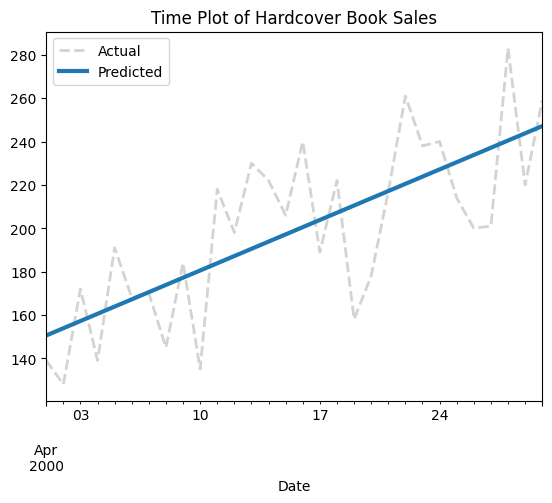

In [ ]:
plot_params = {
    "color": "lightgray",
    "style": "--",
    "linewidth": 2,
    "label": "Actual"
}

# 7. Vẽ biểu đồ theo yêu cầu
ax = y.plot(**plot_params)
ax = y_pred.plot(ax=ax, linewidth=3, label="Predicted")
ax.set_title('Time Plot of Hardcover Book Sales')
ax.legend()
plt.show()

Lag feature

In [ ]:
df['Lag_1'] = df['Hardcover'].shift(1)
df = df.reindex(columns=['Hardcover', 'Lag_1'])

df.head()

Hardcover  Lag_1
Date                        
2000-04-01        139    NaN
2000-04-02        128  139.0
2000-04-03        172  128.0
2000-04-04        139  172.0
2000-04-05        191  139.0

In [ ]:
from sklearn.linear_model import LinearRegression

X = df.loc[:, ['Lag_1']]
X.dropna(inplace=True)  # drop missing values in the feature set
y = df.loc[:, 'Hardcover']  # create the target
y, X = y.align(X, join='inner')  # drop corresponding values in target

model = LinearRegression()
model.fit(X, y)

y_pred = pd.Series(model.predict(X), index=X.index)  # vì y_pred là numpy array, không có index, nên phải pd.series

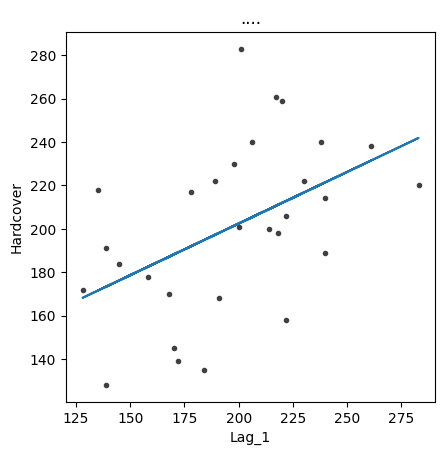

In [ ]:
fig, ax = plt.subplots()
ax.plot(X['Lag_1'], y, '.', color='0.25')
ax.plot(X['Lag_1'], y_pred)
ax.set_aspect('equal')
ax.set_ylabel('Hardcover')
ax.set_xlabel('Lag_1')
ax.set_title('....');

---


# Chương 2: Trend

>Kết hợp điểm mạnh của hai mô hình dự báo bằng kỹ thuật mạnh mẽ này.




1. Trend

- Trend là "đường đi lâu dài" của dữ liệu.

- Không phải là dao động ngắn ngày (như tăng – giảm từng tuần), mà là đường nghiêng dần lên hoặc xuống qua thời gian dài.

- Ví dụ: doanh số iPhone mỗi năm đều tăng → có trend tăng dài hạn.

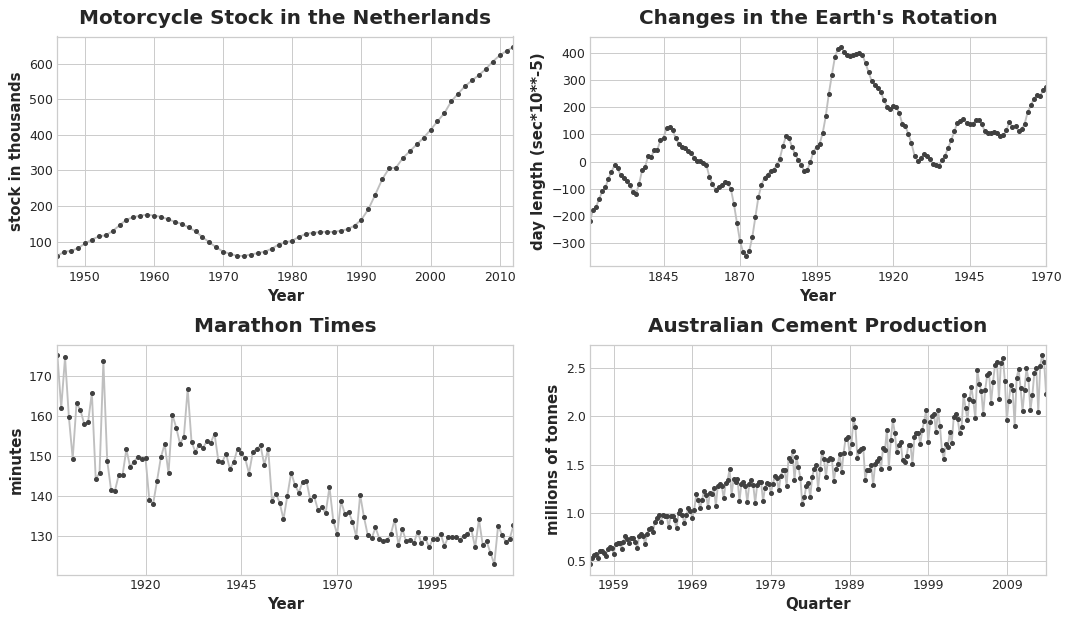

2. Moving Average Plots (Trung Bình Trượt)

- Để biết chuỗi thời gian có xu hướng gì, ta có thể dùng biểu đồ trung bình trượt (moving average).

- Ý tưởng là: làm mượt dữ liệu bằng cách lấy trung bình trong các "cửa sổ trượt", để loại bỏ dao động ngắn hạn và chỉ giữ lại xu hướng dài hạn.

- Moving Average = trung bình của các điểm gần nhau (ví dụ, 7 ngày gần nhất).

- Dùng để làm nổi bật xu hướng dài hạn, ẩn đi dao động nhỏ.

- Bạn có thể vẽ bằng df.rolling(window=12).mean() để thấy xu hướng rõ hơn.




![image.png](https://storage.googleapis.com/kaggle-media/learn/images/EZOXiPs.gif)

3. Engineering Trend


- Sau khi xác định được dạng xu hướng, ta có thể mô hình hóa nó bằng biến thời gian (time).

- Nếu xu hướng có vẻ là parabol (hình cong), ta chỉ cần thêm biến time**2 vào bộ đặc trưng (features), và mô hình sẽ có dạng:

image.png

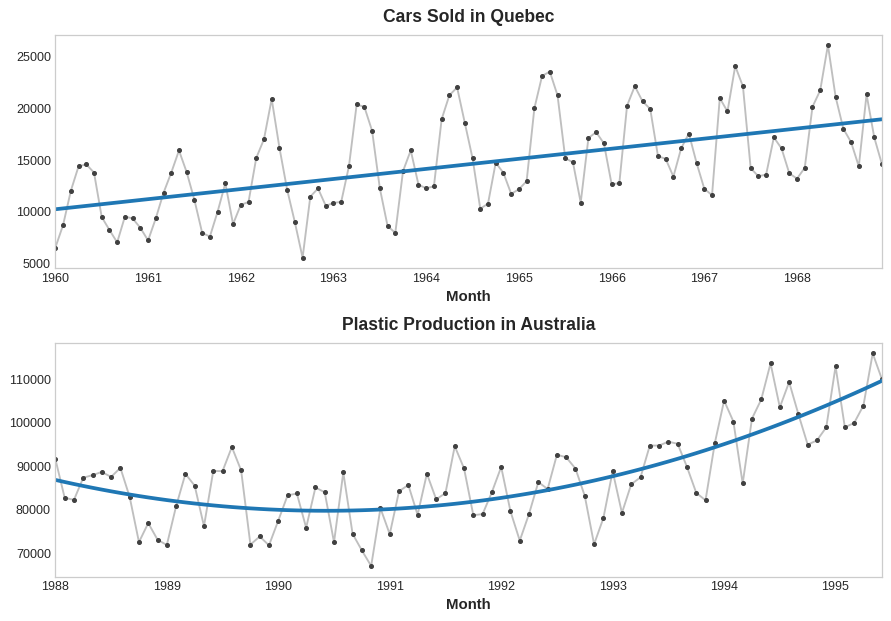

- Mặc dù tên là linear regression, mô hình vẫn fit được đường cong, miễn là bạn cung cấp feature cong (ví dụ: time^2).

- Khi bạn thêm biến time và time^2, mô hình sẽ học đường parabol chứ không chỉ là đường thẳng.

- Đây là mẹo rất phổ biến khi xử lý xu hướng phi tuyến.

nếu ma thẳng thì order = 1 nếu cong thì order = 2




Ví dụ:

1. Load và xem dữ liệu



In [ ]:
import pandas as pd
tunnel = pd.read_csv("tunnel.csv", parse_dates=["Day"])
tunnel = tunnel.set_index("Day").to_period()

2. (Cập nhật): Vẽ Moving Average để nhận diện xu hướng

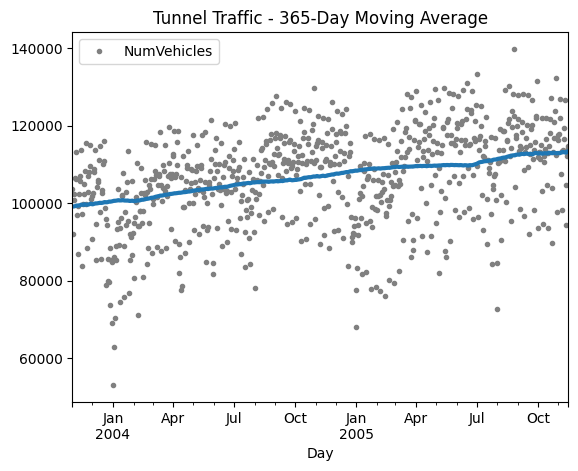

In [ ]:
moving_average = tunnel.rolling(
    window=365,       # cửa sổ trượt rộng 365 ngày
    center=True,      # đặt giá trị trung bình ở giữa cửa sổ
    min_periods=183,  # ít nhất phải có 183 giá trị mới tính trung bình (giảm NaN)
).mean()              # tính trung bình trong mỗi cửa


ax = tunnel.plot(style=".", color="0.5")
moving_average.plot(
    ax=ax, linewidth=3, title="Tunnel Traffic - 365-Day Moving Average", legend=False,
);

3. Tạo DeterministicProcess để mô hình hóa xu hướng (Trend)

In [ ]:
from statsmodels.tsa.deterministic import DeterministicProcess

dp = DeterministicProcess(   # DeterministicProcess dùng để làm gì? Thay vì tự viết tay df["Time"] = np.arange(...), DeterministicProcess làm sạch, nhanh, và chuẩn hơn.

    index=tunnel.index,  # các ngày (dates) từ dữ liệu huấn luyện
    constant=True,       # thêm biến giả để học độ lệch (bias hoặc y_intercept)
    order=1,             # thêm biến thời gian (time dummy – xu hướng tuyến tính)
    drop=True,           # loại bỏ các thành phần nếu cần để tránh đa cộng tuyến
)

# `.in_sample()` tạo ra các đặc trưng (features) cho các ngày trong `index`
X = dp.in_sample()

X.head()

const  trend
Day                     
2003-11-01    1.0    1.0
2003-11-02    1.0    2.0
2003-11-03    1.0    3.0
2003-11-04    1.0    4.0
2003-11-05    1.0    5.0

4. Chuẩn bị target và huấn luyện mô hình

In [ ]:
from sklearn.linear_model import LinearRegression

y = tunnel["NumVehicles"]  # biến mục tiêu (số lượng xe)

# `Intercept` (hệ số chặn) cũng đã có trong biến `const` của `DeterministicProcess`.
# Nếu để LinearRegression tự thêm intercept nữa → bị trùng lặp → sai kết quả.
model = LinearRegression(fit_intercept=False)
model.fit(X, y)

# Tạo dự đoán từ mô hình và gắn lại index thời gian gốc
y_pred = pd.Series(model.predict(X), index=X.index)

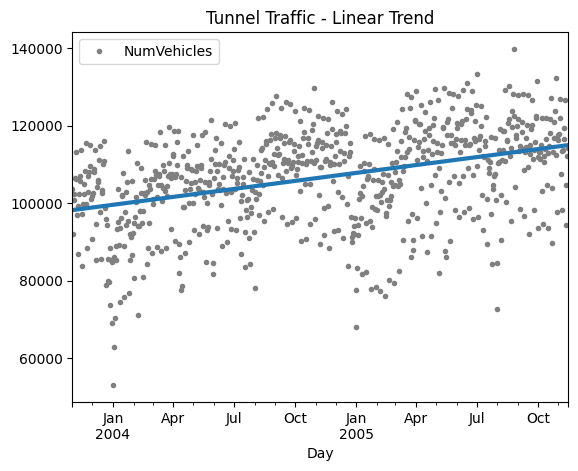

In [ ]:
ax = tunnel.plot(style=".", color="0.5", title="Tunnel Traffic - Linear Trend")
_ = y_pred.plot(ax=ax, linewidth=3, label="Trend")

5. Dự báo

In [ ]:
# Dự báo 30 ngày tiếp theo

X = dp.out_of_sample(steps=30)

y_fore = pd.Series(model.predict(X), index=X.index)

y_fore.head()

2005-11-17    114981.801146
2005-11-18    115004.298595
2005-11-19    115026.796045
2005-11-20    115049.293494
2005-11-21    115071.790944
Freq: D, dtype: float64

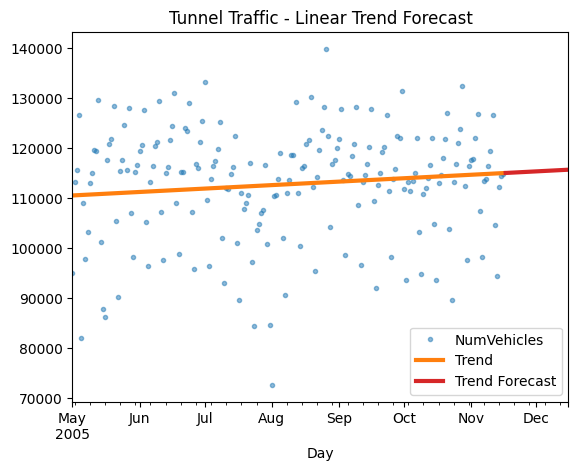

In [ ]:
ax = tunnel["2005-05":].plot(title="Tunnel Traffic - Linear Trend Forecast", **plot_params)
ax = y_pred["2005-05":].plot(ax=ax, linewidth=3, label="Trend")
ax = y_fore.plot(ax=ax, linewidth=3, label="Trend Forecast", color="C3")
_ = ax.legend()

---

# Chương 3: Seasonality (Mùa vụ)

1. Mùa vụ là gì

Là hiện tượng một hiện tượng nào đó lặp lại theo chu kỳ đều đặn, chẳng hạn:

- Mỗi cuối tuần doanh số tăng cao.

- Mỗi hè nhiệt độ tăng lên.

- Mỗi năm vào Tết, lượng mua hàng tăng đột biến.

Tính mùa vụ thường được điều khiển bởi:

- các chu kỳ của tự nhiên trong ngày và năm,

- hoặc bởi tập quán xã hội liên quan đến ngày và thời gian.

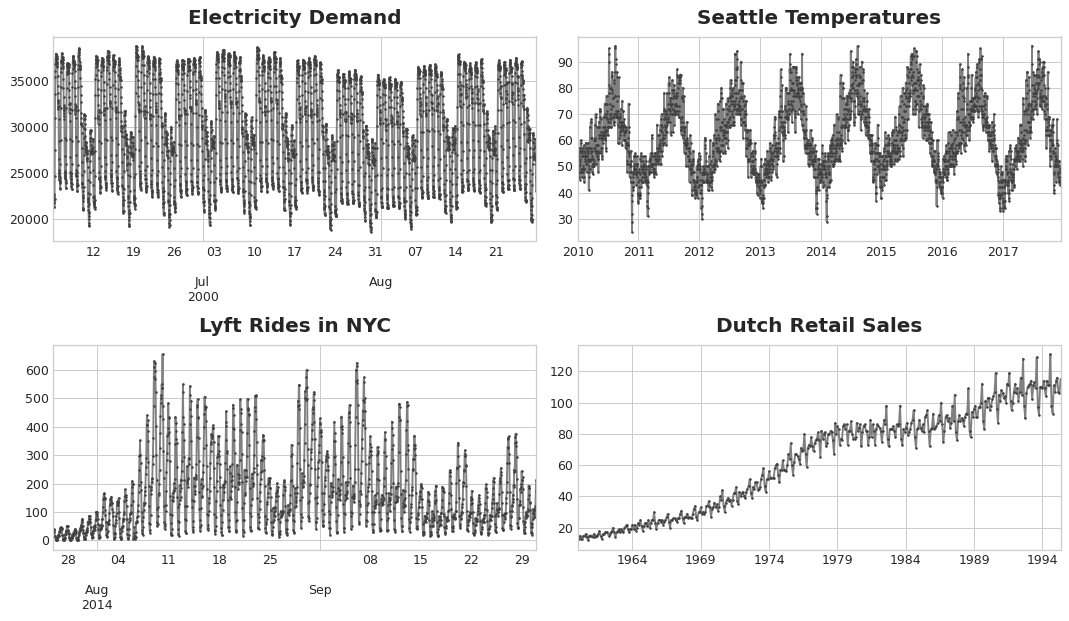

Chúng ta sẽ học hai loại đặc trưng để mô hình hóa tính mùa vụ:

- Indicators (biến chỉ báo) – phù hợp với chu kỳ có ít mốc thời gian, như chu kỳ theo tuần trong dữ liệu theo ngày.

          Khi có ít mốc mùa vụ (ví dụ 7 ngày trong tuần)	Tạo 1 cột cho từng ngày: Monday, Tuesday,... và mô hình sẽ học ảnh hưởng của từng ngày
→ day_of_week = ['Mon', 'Tue', ..., 'Sun']
- Fourier features – phù hợp với chu kỳ có nhiều mốc thời gian, như chu kỳ theo năm trong dữ liệu theo ngày.

      Khi có nhiều mốc (ví dụ 365 ngày trong năm)	Sử dụng sóng sine và cosine để mô hình hóa chu kỳ trơn mượt và liên tục
→ sin(2πt / 365), cos(2πt / 365),...


2. Seasonal Plots and Seasonal Indicators (Biểu đồ theo mùa và các chỉ số theo mùa vụ)

Cũng giống như ta đã dùng biểu đồ trung bình trượt (moving average) để khám phá xu hướng (trend) trong chuỗi, ta có thể sử dụng biểu đồ theo mùa (seasonal plot) để tìm ra mẫu hình theo mùa (seasonal patterns).

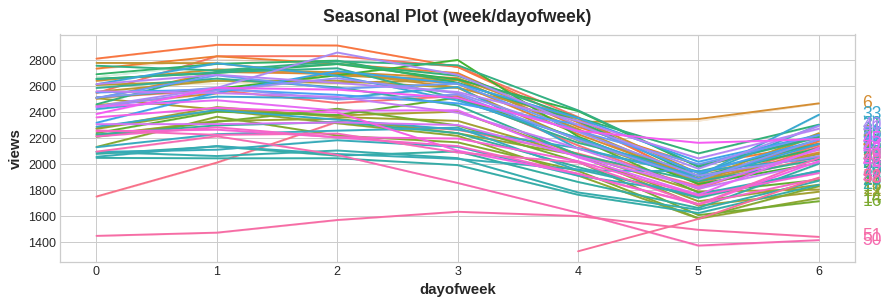

Đây mẫu hình mùa vụ rõ ràng theo tuần trong chuỗi này: lượng xem cao hơn vào các ngày trong tuần và giảm vào cuối tuần.



Dữ liệu theo ngày → chia theo tuần → bạn vẽ tất cả các "thứ 2", "thứ 3",... chồng lên nhau.

Dữ liệu theo tháng → chia theo năm → vẽ tháng 1 qua các năm, tháng 2 qua các năm,...

Seasonal Indicators là gì?

Là cách biểu diễn mùa vụ dưới dạng các biến nhị phân (0 hoặc 1), ví dụ:

- Nếu hôm nay là thứ Ba → cột "Tuesday" = 1, còn lại = 0.

- Hôm sau là thứ Tư → cột "Wednesday" = 1, còn lại = 0.

Mỗi thời điểm chỉ có 1 biến On (1), còn lại đều Off (0).



--

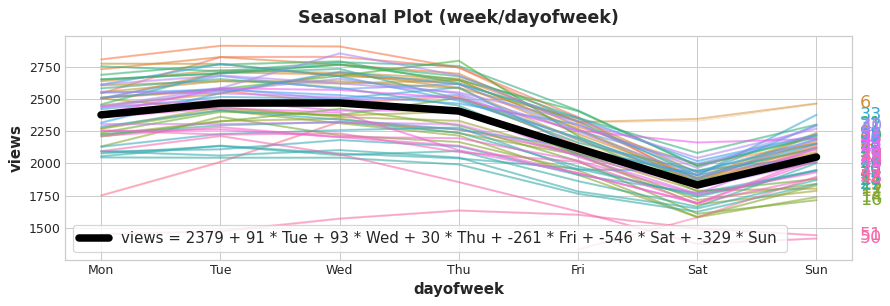

*Chú ý: cần "Bỏ một ngày" trong seasonal indicators

Khi bạn one-hot encode một biến phân loại (ví dụ như ngày trong tuần), bạn sẽ tạo ra n biến nhị phân. Nhưng nếu bạn dùng cả n biến trong mô hình hồi quy tuyến tính (linear regression), thì sẽ xảy ra vấn đề đa cộng tuyến (multicollinearity) – tức là có sự phụ thuộc tuyến tính hoàn toàn giữa các cột, làm mô hình bị sai hoặc không học được hệ số chính xác.

Vì sao lại có đa cộng tuyến?

Ví dụ: nếu bạn có 7 cột cho các ngày trong tuần, thì tổng giá trị của 7 cột này luôn bằng 1 (vì mỗi ngày chỉ có đúng 1 cột là 1, còn lại là 0). Điều này khiến một cột có thể được biểu diễn hoàn toàn từ các cột còn lại.

Thay vì dùng cả 7 cột (Monday → Sunday), bạn bỏ đi 1 cột, ví dụ Monday.

Mô hình sẽ học:

Intercept (hệ số chặn) tương ứng với giá trị trung bình vào Monday.

Các hệ số còn lại là mức chênh lệch so với Monday:

Ví dụ: hệ số của “Tuesday” = +100 → nghĩa là ngày Tuesday có giá trị trung bình cao hơn Monday 100 đơn vị.

In [ ]:
import pandas as pd

# Giả sử bạn có các ngày trong tuần:
df = pd.DataFrame({
    'date': pd.date_range('2024-01-01', periods=7),
})
df['day'] = df['date'].dt.day_name()  # Lấy tên ngày trong tuần

# One-hot encoding, bỏ Monday
day_dummies = pd.get_dummies(df['day'], drop_first=True)
print(day_dummies)

3. Fourier Features and the Periodogram (Các tính năng Fourier và biểu đồ chu kỳ)

Fourier features là các biến đặc trưng (features) được tạo từ hàm sin/cos để mô hình hóa chu kỳ (seasonality) trong dữ liệu time series. (cụ thể hơn ở dưới)

- Giả sử bạn có dữ liệu hàng ngày trong nhiều năm, và bạn thấy rõ có một chu kỳ hàng năm (ví dụ: mỗi mùa hè số lượt truy cập tăng mạnh). Nếu bạn dùng one-hot cho từng ngày thì sẽ phải tạo ra 365 cột — quá nhiều!

→ Quá cồng kềnh và không hiệu quả.

Giải pháp: Fourier Features

Thay vì tạo ra hàng trăm cột cho mỗi ngày, bạn dùng vài hàm toán học (sine & cosine) để mô tả hình dạng lặp lại đó:

Giống như vẽ một đường sóng mịn uốn lượn trùng với dạng lặp đi lặp lại của dữ liệu.

Mỗi sóng tương ứng với một tần số (ví dụ: tuần = 7 ngày, năm = 365 ngày…).

Bạn có thể kết hợp vài sóng để tạo thành một đường cong lặp phức tạp hơn, mô phỏng mùa vụ thực tế.

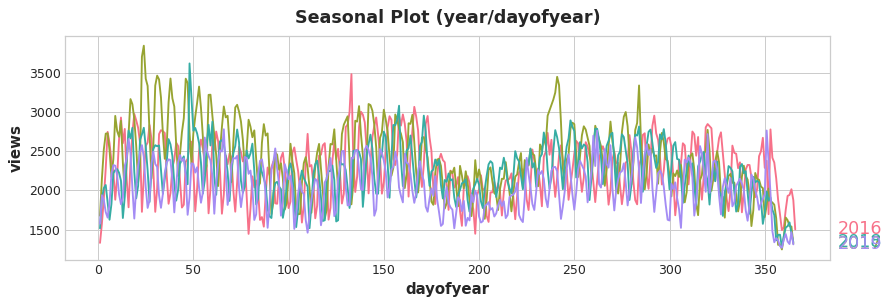

- Fourier features là các cặp đường cong sine và cosine, mỗi cặp tương ứng với một tần số (frequency) tiềm năng trong chu kỳ (season), bắt đầu từ tần số thấp nhất (chu kỳ dài nhất).

- Các cặp Fourier mô hình hóa tính mùa vụ hàng năm sẽ có các tần số: 1 lần mỗi năm, 2 lần mỗi năm, 3 lần mỗi năm, và cứ tiếp tục như vậy.

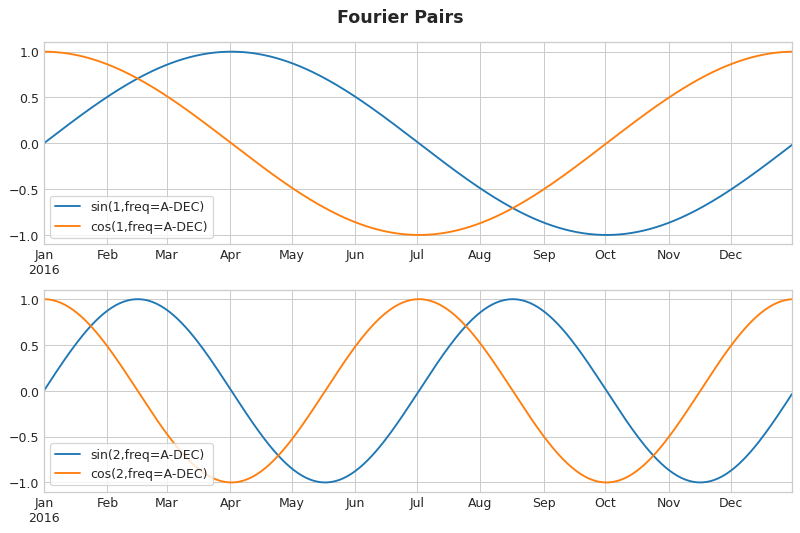

Hình minh họa hai cặp Fourier đầu tiên cho mùa vụ hàng năm. Trên: Tần số 1 lần/năm. Dưới: Tần số 2 lần/năm.

- Nếu chúng ta thêm một tập hợp các đường cong sine / cosine này vào dữ liệu huấn luyện, thuật toán hồi quy tuyến tính sẽ tự động tìm ra hệ số trọng số (weights) để khớp với thành phần mùa vụ trong chuỗi mục tiêu.

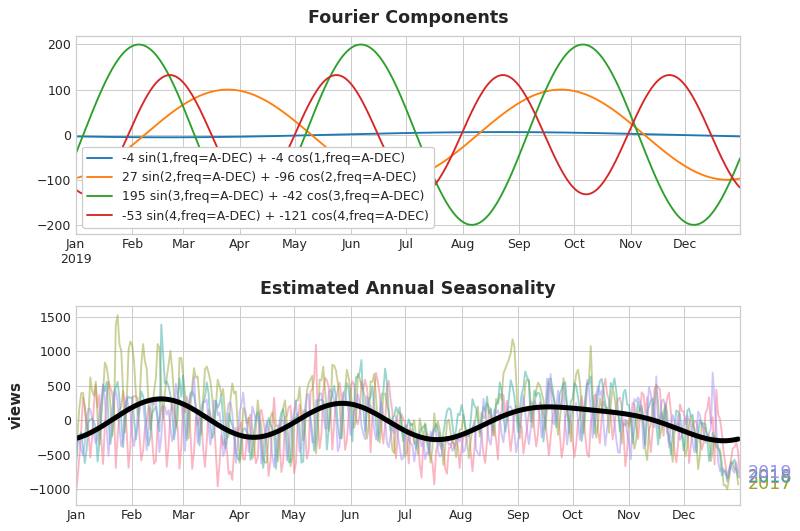

Hình minh họa bên dưới cho thấy hồi quy tuyến tính sử dụng bốn cặp Fourier để mô hình hóa chu kỳ mùa vụ hàng năm trong chuỗi dữ liệu Wikipedia Trigonometry.

- Hãy chú ý rằng chúng ta chỉ cần 8 đặc trưng (4 cặp sine / cosine) để có được một ước lượng tốt cho mùa vụ hàng năm. So sánh điều này với phương pháp indicator mùa vụ, vốn sẽ cần hàng trăm đặc trưng (mỗi ngày trong năm là một cột).

- Bằng cách chỉ mô hình hóa "ảnh hưởng chính" của mùa vụ với Fourier features, bạn thường cần thêm rất ít đặc trưng vào dữ liệu huấn luyện, điều này giúp:

Giảm thời gian tính toán

Giảm nguy cơ overfitting



Khi bạn dùng order=4(8 đặc trưng là 4sin +4 cos), bạn cho mô hình quyền học được 4 kiểu dao động tuần hoàn:

hiểu đơn giản cách chọn order:

1/năm → tổng thể

2/năm → mùa (season)

3/năm → theo nhóm tháng

4/năm → quý hoặc các dịp như hè, lễ tết

Chọn đặc trưng Fourier bằng Periodogram



Vậy chúng ta nên bao gồm bao nhiêu cặp Fourier trong tập đặc trưng?
Chúng ta có thể trả lời câu hỏi này bằng cách sử dụng periodogram.

Periodogram cho bạn biết độ mạnh của các tần số trong một chuỗi thời gian. Là biểu đồ phân tích tần số trong chuỗi thời gian.




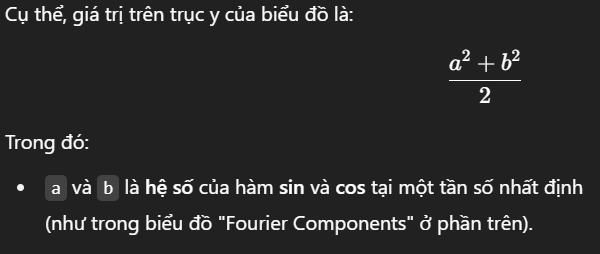

Dùng periodogram để làm gì?

→ Để quyết định chọn bao nhiêu cặp Fourier.


Ví dụ:

Nếu periodogram giảm mạnh sau tần số 4 lần/năm,
thì chọn order = 4 là đủ → tạo 4 sin + 4 cos = 8 đặc trưng.

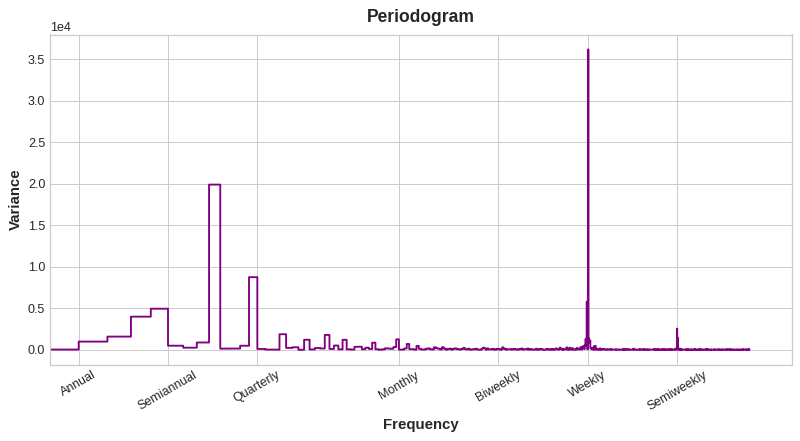

Biểu đồ Periodogram cho chuỗi Wiki Trigonometry



Từ trái sang phải, periodogram giảm mạnh sau mốc "Quarterly" (4 lần mỗi năm).
→ Vì vậy, chúng ta chọn 4 cặp Fourier để mô hình hóa mùa vụ hàng năm.



Tần số nào nên dùng indicator thay vì Fourier?
Với chu kỳ ngắn, như 7 ngày / tuần, ta dùng one-hot indicator tốt hơn.

Fourier phù hợp hơn với chu kỳ dài (như năm, quý).

Ví dụ: Dự báo số lượng xe đi qua hầm (NumVehicles) theo thời gian, bằng cách:

In [ ]:
from pathlib import Path
from warnings import simplefilter

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from statsmodels.tsa.deterministic import CalendarFourier, DeterministicProcess

simplefilter("ignore")

sns.set_theme(style="whitegrid")

# Matplotlib custom
plt.rc("figure", autolayout=True, figsize=(11, 5))
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=16,
    titlepad=10,
)
plot_params = dict(
    color="0.75",
    style=".-",
    markeredgecolor="0.25",
    markerfacecolor="0.25",
    legend=False,
)
%config InlineBackend.figure_format = 'retina'


# annotations: https://stackoverflow.com/a/49238256/5769929
def seasonal_plot(X, y, period, freq, ax=None):
    if ax is None:
        _, ax = plt.subplots()
    palette = sns.color_palette("husl", n_colors=X[period].nunique(),)
    ax = sns.lineplot(
        x=freq,
        y=y,
        hue=period,
        data=X,
        ci=False,
        ax=ax,
        palette=palette,
        legend=False,
    )
    ax.set_title(f"Seasonal Plot ({period}/{freq})")
    for line, name in zip(ax.lines, X[period].unique()):
        y_ = line.get_ydata()[-1]
        ax.annotate(
            name,
            xy=(1, y_),
            xytext=(6, 0),
            color=line.get_color(),
            xycoords=ax.get_yaxis_transform(),
            textcoords="offset points",
            size=14,
            va="center",
        )
    return ax


def plot_periodogram(ts, detrend='linear', ax=None):
    from scipy.signal import periodogram
    fs = pd.Timedelta("365D") / pd.Timedelta("1D")
    freqencies, spectrum = periodogram(
        ts,
        fs=fs,
        detrend=detrend,
        window="boxcar",
        scaling='spectrum',
    )
    if ax is None:
        _, ax = plt.subplots()
    ax.step(freqencies, spectrum, color="purple")
    ax.set_xscale("log")
    ax.set_xticks([1, 2, 4, 6, 12, 26, 52, 104])
    ax.set_xticklabels(
        [
            "Annual (1)",
            "Semiannual (2)",
            "Quarterly (4)",
            "Bimonthly (6)",
            "Monthly (12)",
            "Biweekly (26)",
            "Weekly (52)",
            "Semiweekly (104)",
        ],
        rotation=30,
    )
    ax.ticklabel_format(axis="y", style="sci", scilimits=(0, 0))
    ax.set_ylabel("Variance")
    ax.set_title("Periodogram")
    return ax


tunnel = pd.read_csv("tunnel.csv", parse_dates=["Day"])
tunnel = tunnel.set_index("Day").to_period("D")

 2. Tạo đặc trưng mùa vụ

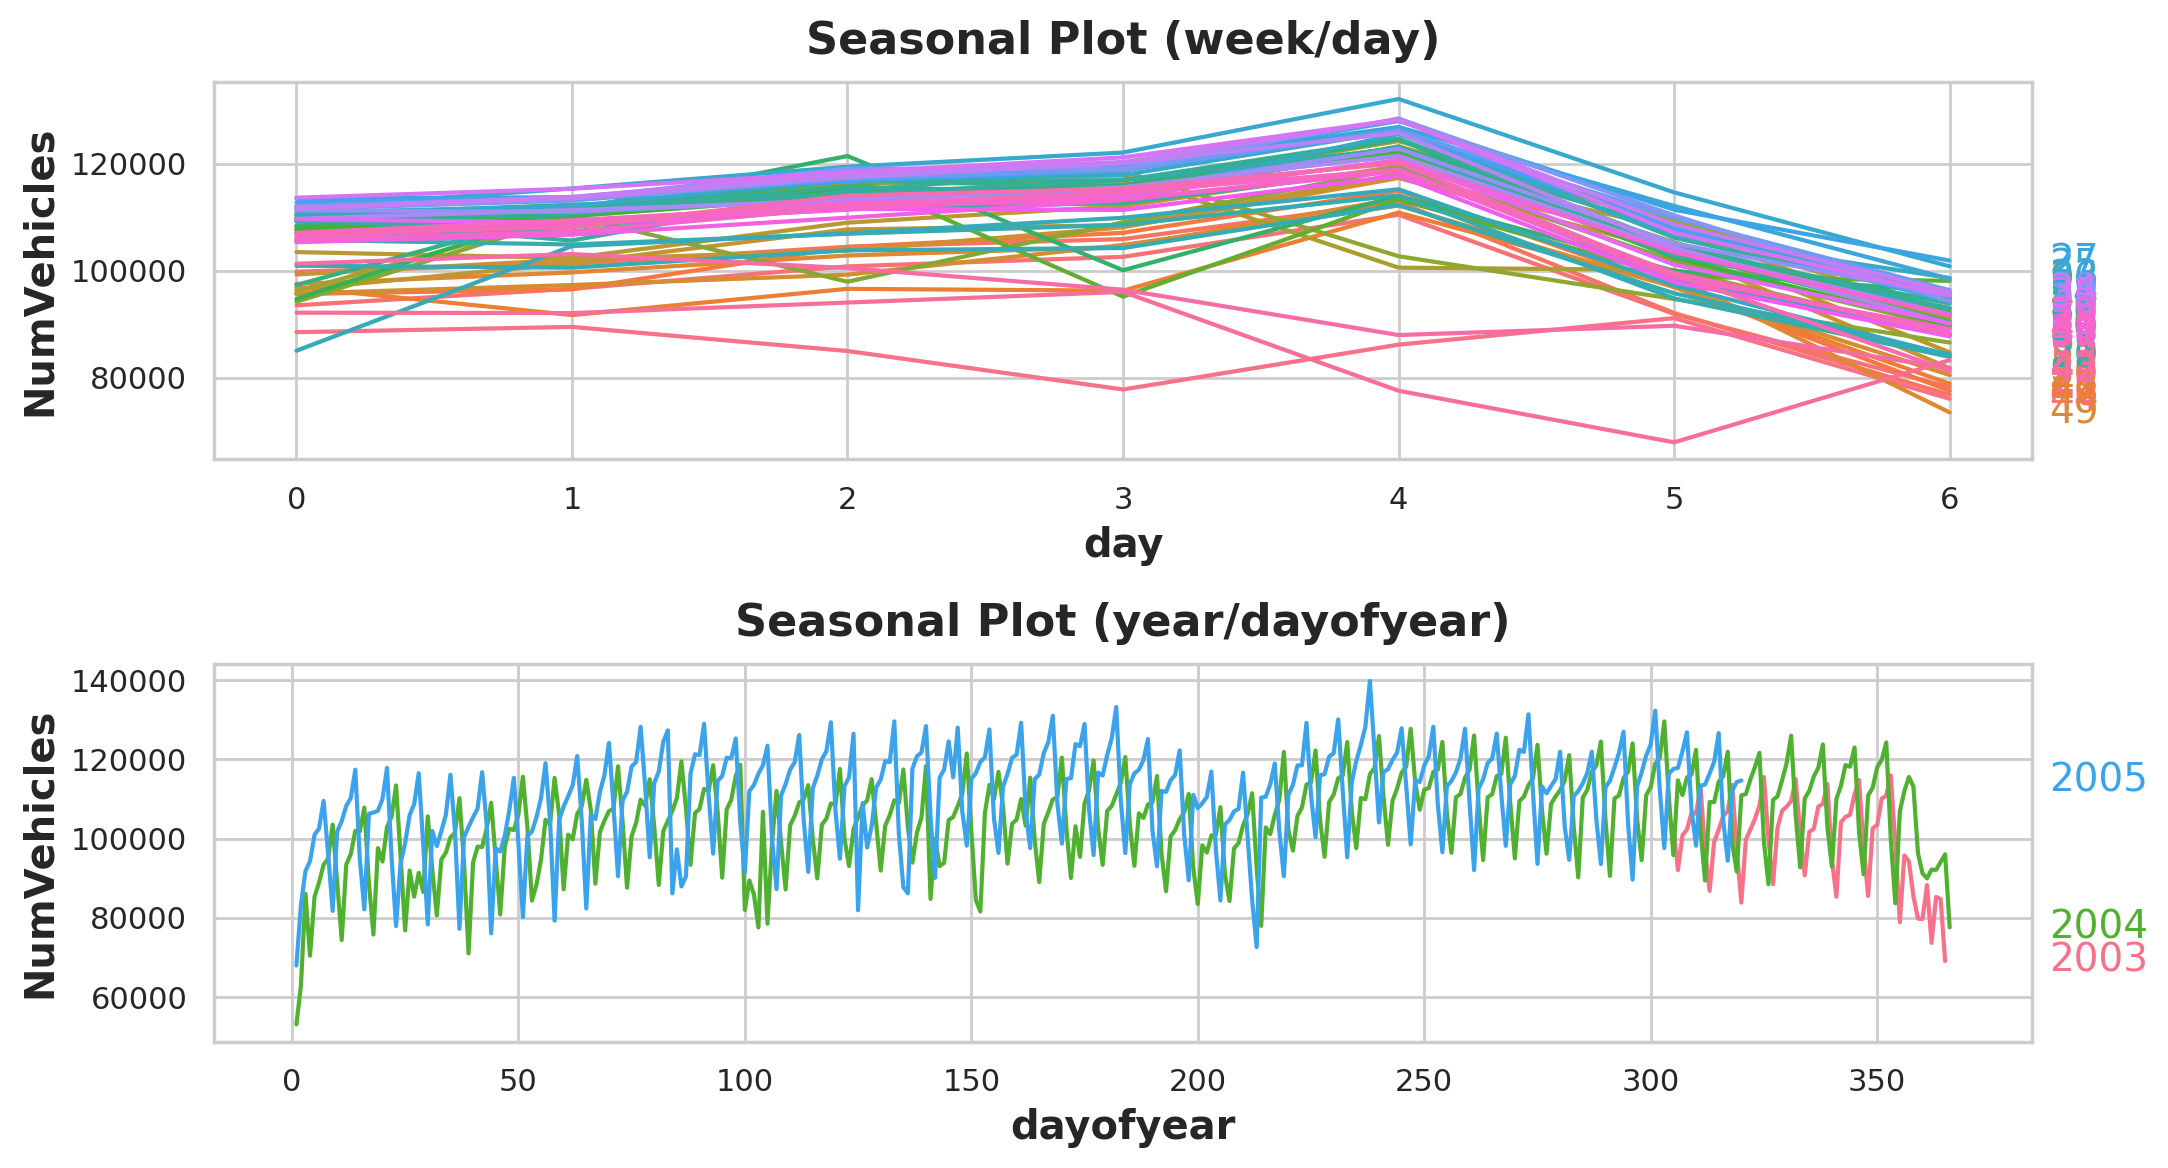

In [ ]:
X = tunnel.copy()

# days within a week
X["day"] = X.index.dayofweek  # the x-axis (freq)
X["week"] = X.index.week  # the seasonal period (period)

# days within a year
X["dayofyear"] = X.index.dayofyear
X["year"] = X.index.year
fig, (ax0, ax1) = plt.subplots(2, 1, figsize=(11, 6))
seasonal_plot(X, y="NumVehicles", period="week", freq="day", ax=ax0)
seasonal_plot(X, y="NumVehicles", period="year", freq="dayofyear", ax=ax1);

3. Phân tích Periodogram

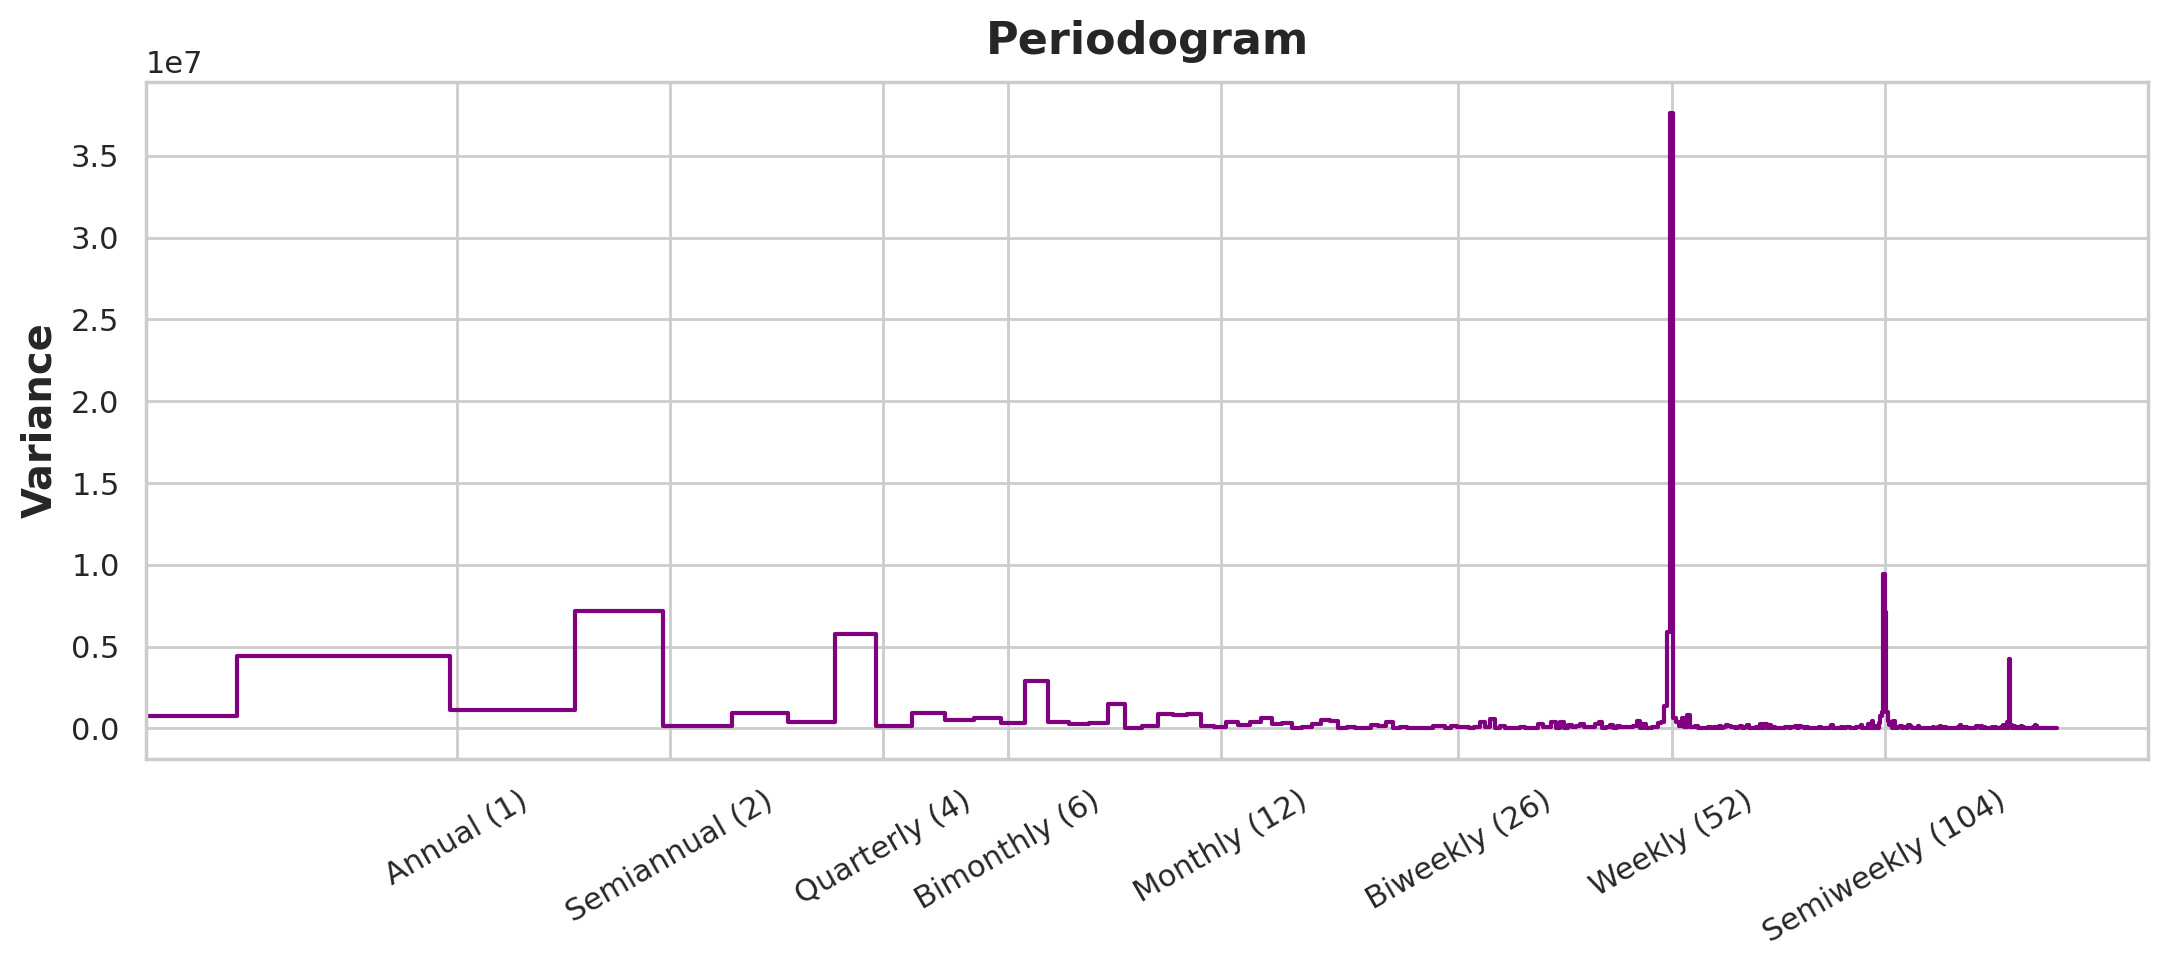

In [ ]:
plot_periodogram(tunnel.NumVehicles);

4. thiết lập thông số bằng DeterministicProcess

In [ ]:
from statsmodels.tsa.deterministic import CalendarFourier, DeterministicProcess

fourier = CalendarFourier(freq="A", order=10)  # 10 sin/cos pairs for "A"nnual seasonality

dp = DeterministicProcess(
    index=tunnel.index,
    constant=True,           # thêm bias
    order=1,                 # xu hướng tuyến tính
    seasonal=True,           # chỉ báo tuần (one-hot)
    additional_terms=[fourier],  # Fourier cho mùa vụ năm
    drop=True,               # loại bỏ trùng lặp (giảm collinearity)
)


X = dp.in_sample()  # create features for dates in tunnel.index

5. Huấn luyện mô hình và dự báo

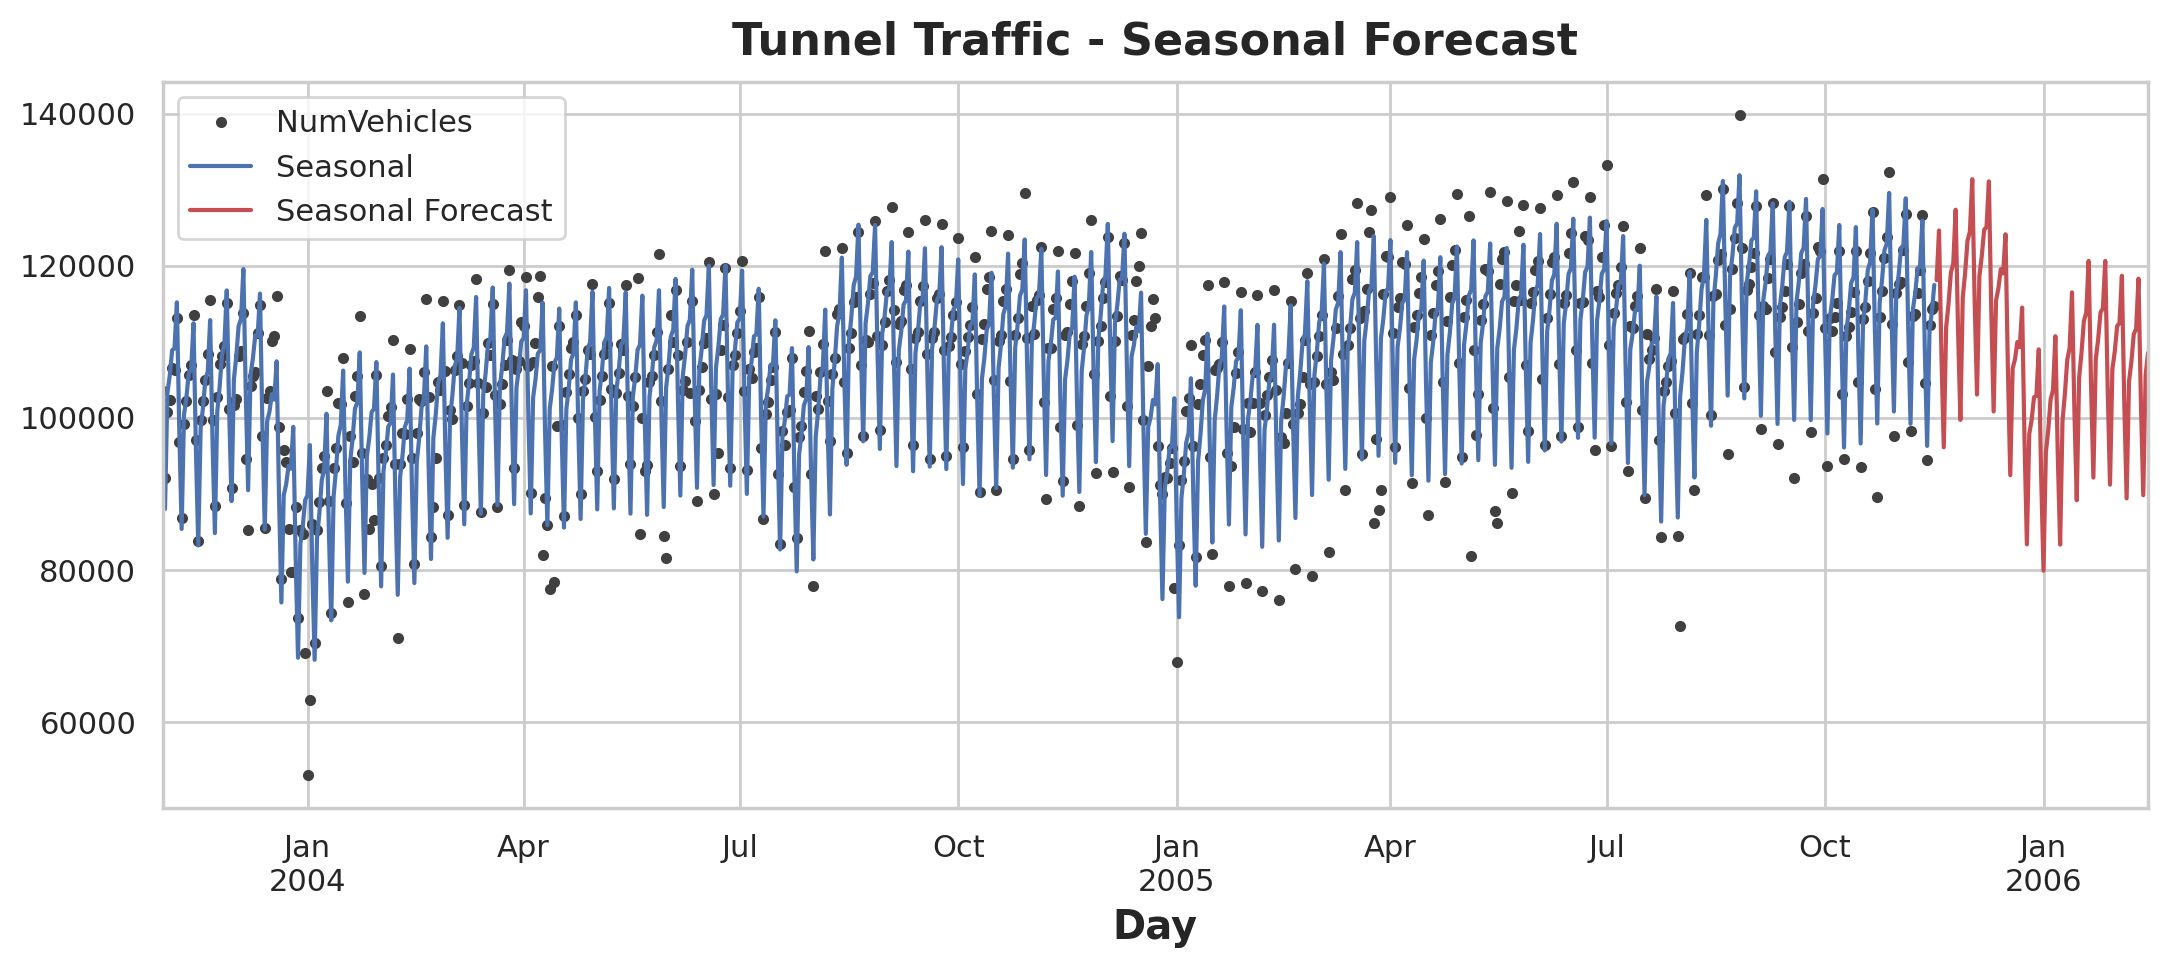

In [ ]:
y = tunnel["NumVehicles"]

model = LinearRegression(fit_intercept=False)
_ = model.fit(X, y)

y_pred = pd.Series(model.predict(X), index=y.index)
X_fore = dp.out_of_sample(steps=90)
y_fore = pd.Series(model.predict(X_fore), index=X_fore.index)

ax = y.plot(color='0.25', style='.', title="Tunnel Traffic - Seasonal Forecast")
ax = y_pred.plot(ax=ax, label="Seasonal")
ax = y_fore.plot(ax=ax, label="Seasonal Forecast", color='C3')
_ = ax.legend()

# Chương 4: Time Series as Features (Chuỗi thời gian làm đặc trưng)
> "Dự đoán tương lai từ quá khứ" bằng cách tạo các đặc trưng "độ trễ" (lag embedding).



Trong các bài trước, ta đã học cách mô hình hóa chuỗi thời gian dựa vào thời gian (time dependent), ví dụ như xu hướng (trend) hay mùa vụ (seasonality) – tức là tạo đặc trưng từ ngày tháng, tuần, năm.

Nhưng có những loại chuỗi thời gian không thể giải thích bằng thời gian đơn thuần, mà phải dùng chính giá trị quá khứ của chuỗi làm đặc trưng ⇒ gọi là serial dependence (phụ thuộc theo chuỗi).

Nói cách khác:

Thay vì hỏi: “Ngày này trong năm có ảnh hưởng gì không?”
Ta hỏi: “Giá trị hôm nay bị ảnh hưởng bởi giá trị hôm qua thế nào?”

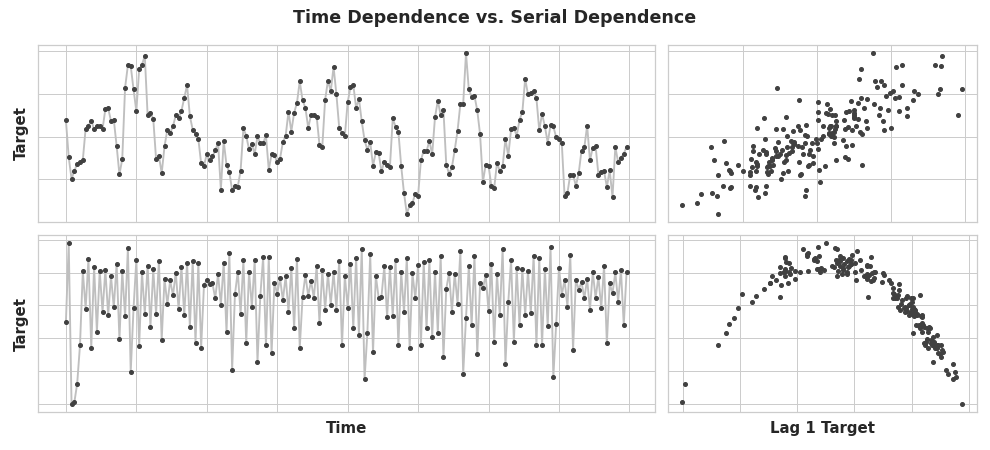

Biểu đồ bên trái: Vẽ theo trục thời gian ⇒ mô hình học "time dependence"

Biểu đồ bên phải: Vẽ giá trị hiện tại theo giá trị trước đó (t so với t-1) ⇒ mô hình học "serial dependence"

Lúc này, ta đang dạy model học mối quan hệ giữa các điểm dữ liệu với nhau, không phụ thuộc ngày tháng cụ thể.

1. Cycles – Chu kỳ

Một trong những dạng phổ biến nhất của serial dependence là chu kỳ (cycle).
Cycle là các mô hình tăng và giảm lặp lại, nơi giá trị tại thời điểm hiện tại phụ thuộc vào các giá trị trước đó, nhưng không nhất thiết liên quan đến thời gian cụ thể nào.

- Mùa vụ xảy ra vào các thời điểm cố định (Tết, lễ, thứ 7, tháng 12,…)

- Chu kỳ xảy ra khi nào cũng được, miễn là có sự tác động từ quá khứ

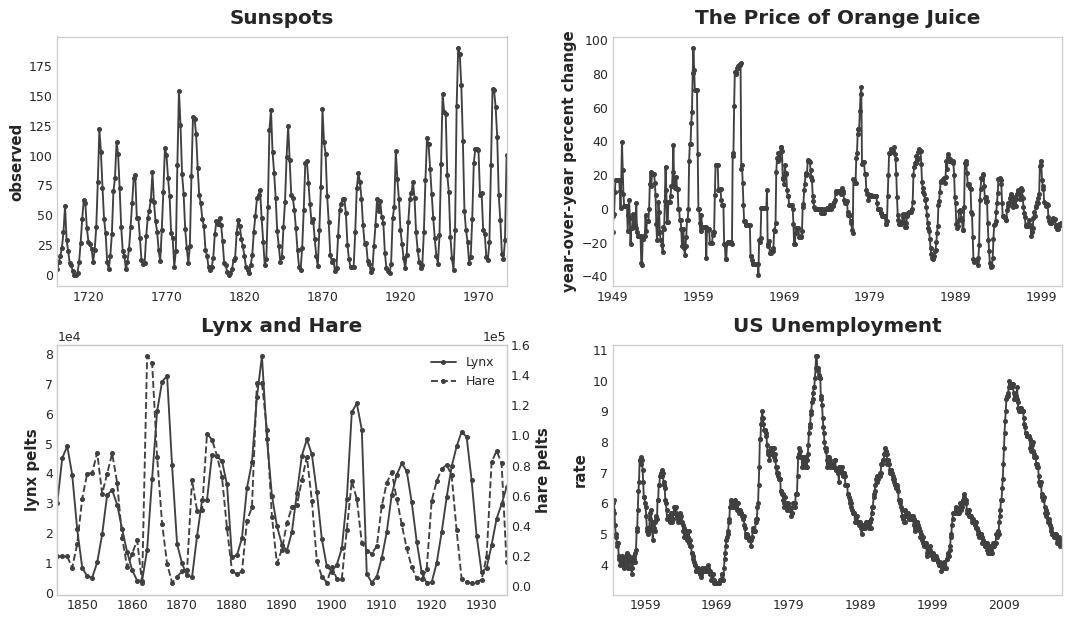

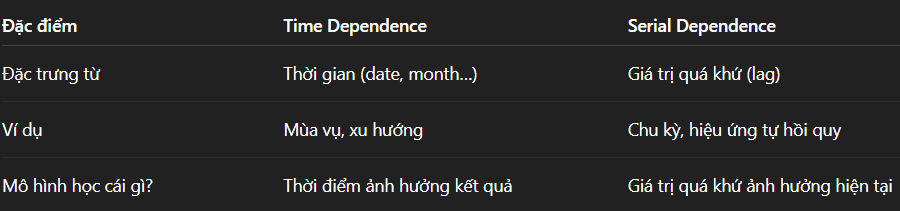

2. Lagged Series and Lag Plots



Lag plot của một chuỗi thời gian là đồ thị biểu diễn giá trị hiện tại so với các giá trị lag. Phụ thuộc tuần tự thường thể hiện rõ trên lag plot.

Lag plot của tỷ lệ thất nghiệp với hệ số tự tương quan (autocorrelation) được chỉ ra.



Nếu thấy đường cong, đường thẳng rõ nét → chứng tỏ chuỗi có liên hệ quá khứ - hiện tại ⇒ nên dùng lag.

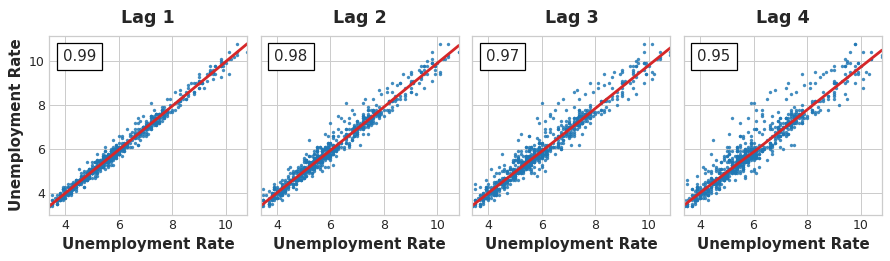

Autocorrelation là gì?

Autocorrelation là thước đo phổ biến nhất cho phụ thuộc tuần tự là tự tương quan (autocorrelation) – đơn giản là hệ số tương quan giữa chuỗi với chính nó tại một độ trễ.

Ví dụ, chuỗi thất nghiệp Mỹ có:

Autocorrelation = 0.99 tại lag 1,

0.98 tại lag 2, ...



3. Choosing lags(chọn lag)

Khi chọn lag làm đặc trưng, không cần dùng mọi lag có autocorrelation cao.

 Ví dụ: autocorrelation tại lag 2 có thể chỉ là “dư âm” của lag 1 (không cung cấp thông tin mới).
Nếu lag 2 không mang thêm thông tin, thì không cần đưa vào khi lag 1 đã có.


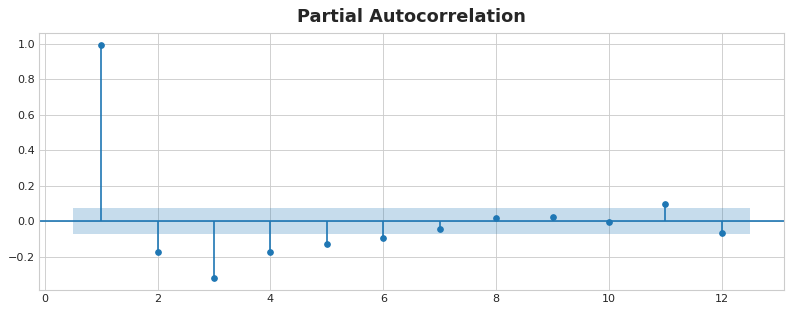

Partial autocorrelation là gì?

Partial autocorrelation (tự tương quan riêng phần) cho biết một lag có đóng góp thông tin mới hay không, sau khi đã loại bỏ ảnh hưởng của các lag trước.

Dựa vào đồ thị partial autocorrelation, ta có thể chọn lag nào nên dùng.
Ví dụ, trong hình, từ lag 1 đến lag 6 nằm ngoài vùng “không tương quan” ⇒ có thể dùng 6 lag đầu. (Lag 11 có thể là dương tính giả (không thực sự có tương quan).

Biểu đồ partial autocorrelation như trên được gọi là correlogram.
Correlogram đối với lag thì giống như periodogram đối với Fourier.



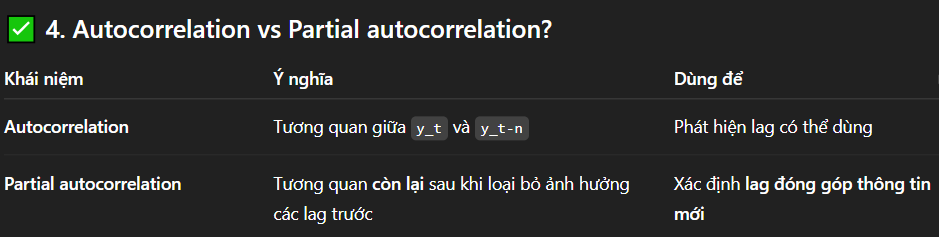

4. Phi tuyến ()

Lưu ý rằng autocorrelation và partial autocorrelation chỉ đo mối quan hệ tuyến tính.

Vì chuỗi thực tế thường có quan hệ phi tuyến, nên nên xem lag plot, hoặc dùng thước đo khác như mutual information.

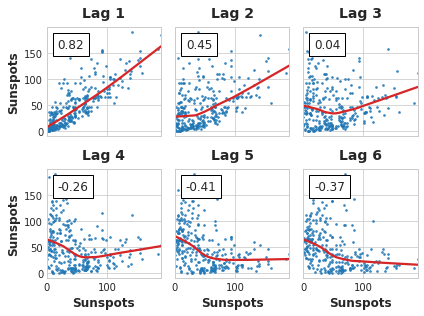

Ví dụ: chuỗi Sunspots có phụ thuộc phi tuyến

Ví dụ: Bộ dữ liệu Flu Trends ghi lại số lượt khám cúm hàng tuần từ năm 2009 đến 2016. Mục tiêu của chúng ta là dự báo số ca cúm trong các tuần sắp tới.

Chúng ta sẽ dùng hai cách tiếp cận.

Dự báo lượt khám dựa trên các đặc trưng trễ (lag) của chính chuỗi thời gian FluVisits.

Dự báo dựa trên các chỉ số tìm kiếm liên quan đến cúm (từ Google Trends), cũng dùng dưới dạng lag.

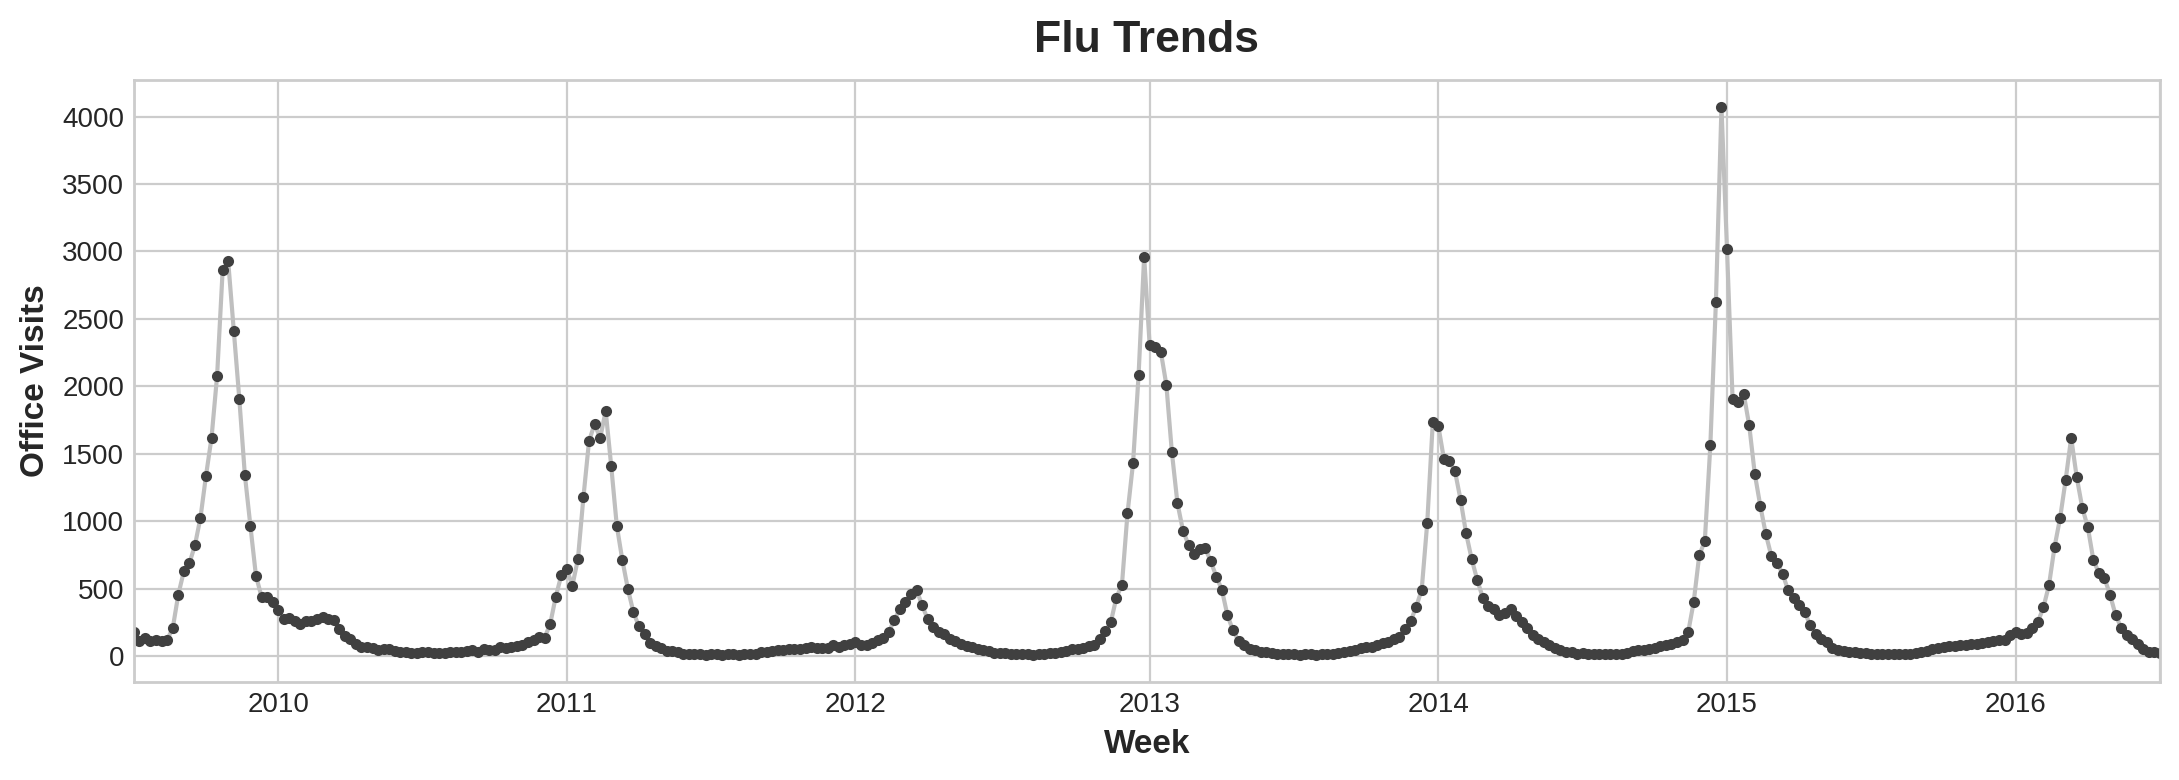

In [ ]:
from pathlib import Path
from warnings import simplefilter

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.signal import periodogram
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from statsmodels.graphics.tsaplots import plot_pacf

simplefilter("ignore")

# Set Matplotlib defaults
plt.style.use("seaborn-v0_8-whitegrid")
plt.rc("figure", autolayout=True, figsize=(11, 4))
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=16,
    titlepad=10,
)
plot_params = dict(
    color="0.75",
    style=".-",
    markeredgecolor="0.25",
    markerfacecolor="0.25",
)
%config InlineBackend.figure_format = 'retina'


def lagplot(x, y=None, lag=1, standardize=False, ax=None, **kwargs):
    from matplotlib.offsetbox import AnchoredText
    x_ = x.shift(lag)
    if standardize:
        x_ = (x_ - x_.mean()) / x_.std()
    if y is not None:
        y_ = (y - y.mean()) / y.std() if standardize else y
    else:
        y_ = x
    corr = y_.corr(x_)
    if ax is None:
        fig, ax = plt.subplots()
    scatter_kws = dict(
        alpha=0.75,
        s=3,
    )
    line_kws = dict(color='C3', )
    ax = sns.regplot(x=x_,
                     y=y_,
                     scatter_kws=scatter_kws,
                     line_kws=line_kws,
                     lowess=True,
                     ax=ax,
                     **kwargs)
    at = AnchoredText(
        f"{corr:.2f}",
        prop=dict(size="large"),
        frameon=True,
        loc="upper left",
    )
    at.patch.set_boxstyle("square, pad=0.0")
    ax.add_artist(at)
    ax.set(title=f"Lag {lag}", xlabel=x_.name, ylabel=y_.name)
    return ax


def plot_lags(x, y=None, lags=6, nrows=1, lagplot_kwargs={}, **kwargs):
    import math
    kwargs.setdefault('nrows', nrows)
    kwargs.setdefault('ncols', math.ceil(lags / nrows))
    kwargs.setdefault('figsize', (kwargs['ncols'] * 2, nrows * 2 + 0.5))
    fig, axs = plt.subplots(sharex=True, sharey=True, squeeze=False, **kwargs)
    for ax, k in zip(fig.get_axes(), range(kwargs['nrows'] * kwargs['ncols'])):
        if k + 1 <= lags:
            ax = lagplot(x, y, lag=k + 1, ax=ax, **lagplot_kwargs)
            ax.set_title(f"Lag {k + 1}", fontdict=dict(fontsize=14))
            ax.set(xlabel="", ylabel="")
        else:
            ax.axis('off')
    plt.setp(axs[-1, :], xlabel=x.name)
    plt.setp(axs[:, 0], ylabel=y.name if y is not None else x.name)
    fig.tight_layout(w_pad=0.1, h_pad=0.1)
    return fig

flu_trends = pd.read_csv("flu-trends.csv")
flu_trends.set_index(
    pd.PeriodIndex(flu_trends.Week, freq="W"),
    inplace=True,
)
flu_trends.drop("Week", axis=1, inplace=True)

ax = flu_trends.FluVisits.plot(title='Flu Trends', **plot_params)
_ = ax.set(ylabel="Office Visits")

Nhìn hình xem có tuyến tính kh sau đó chọn số lag

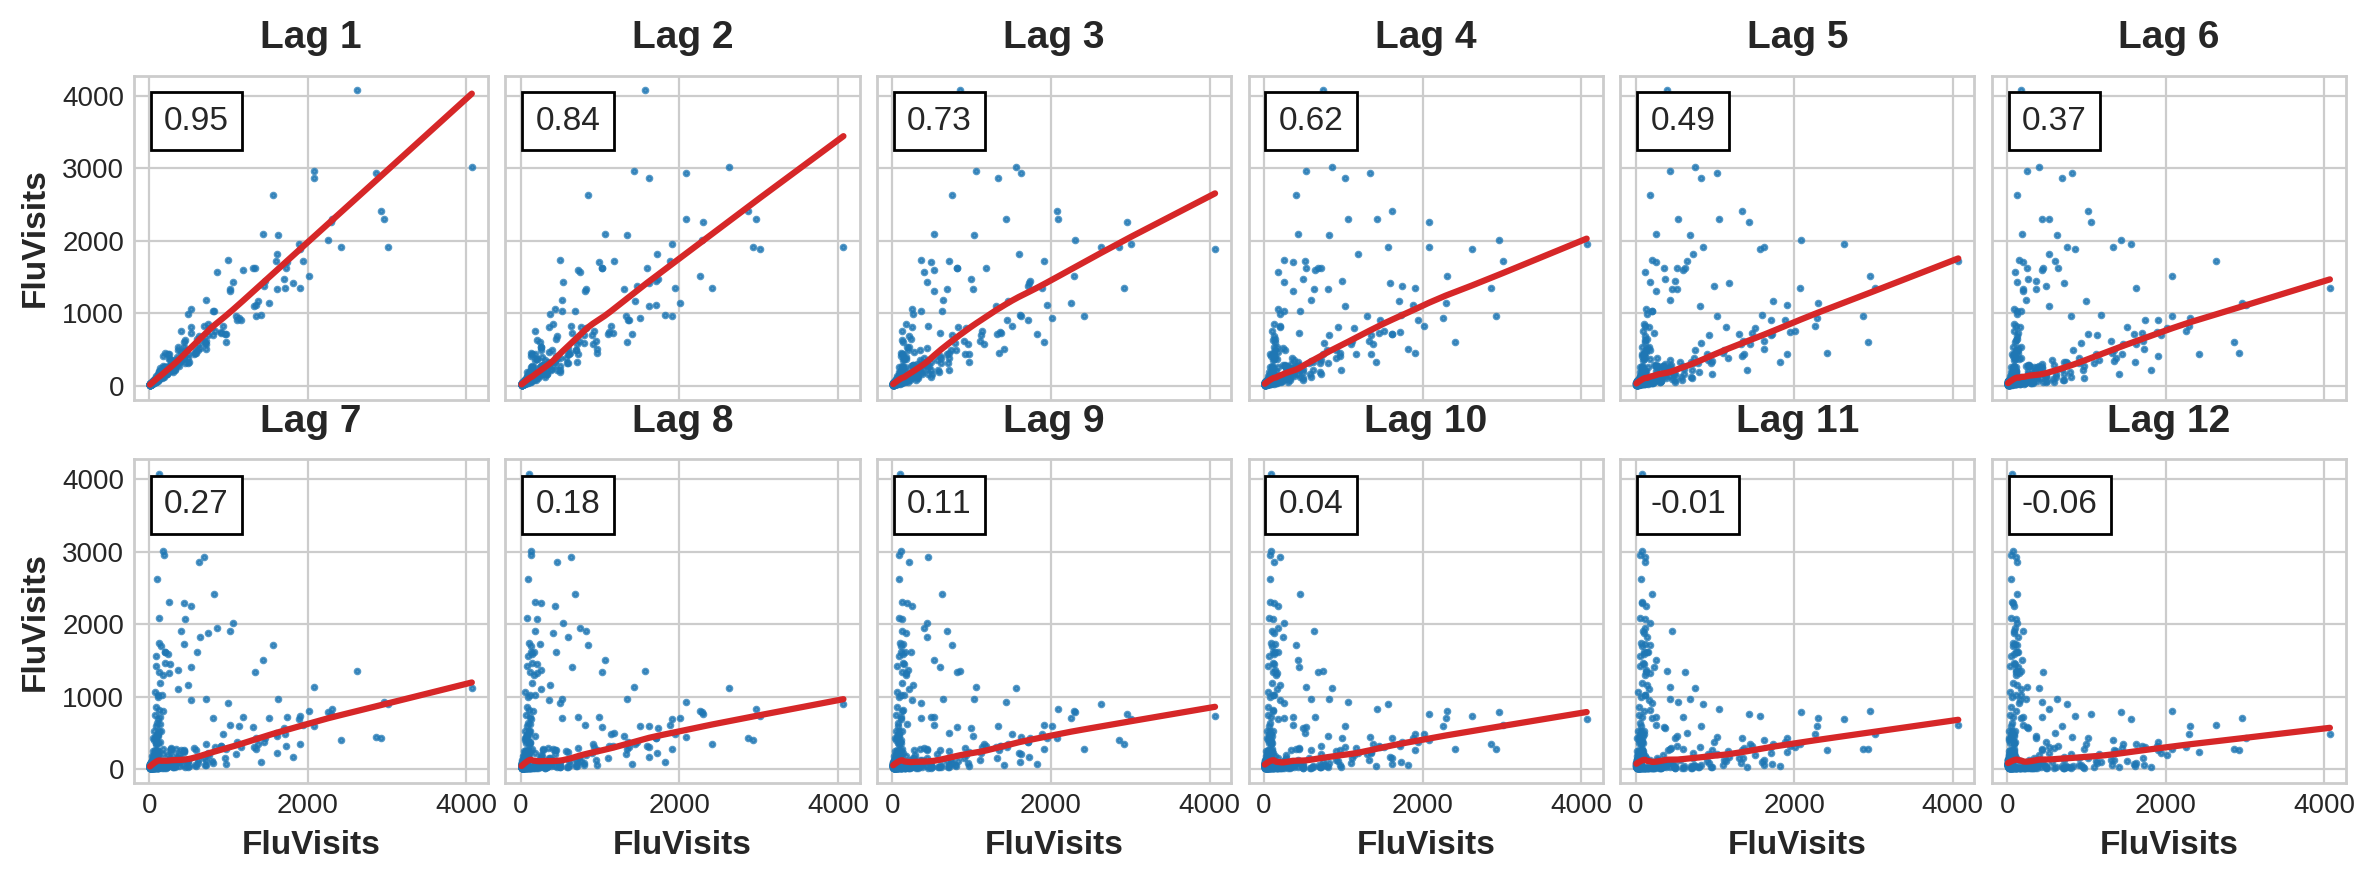

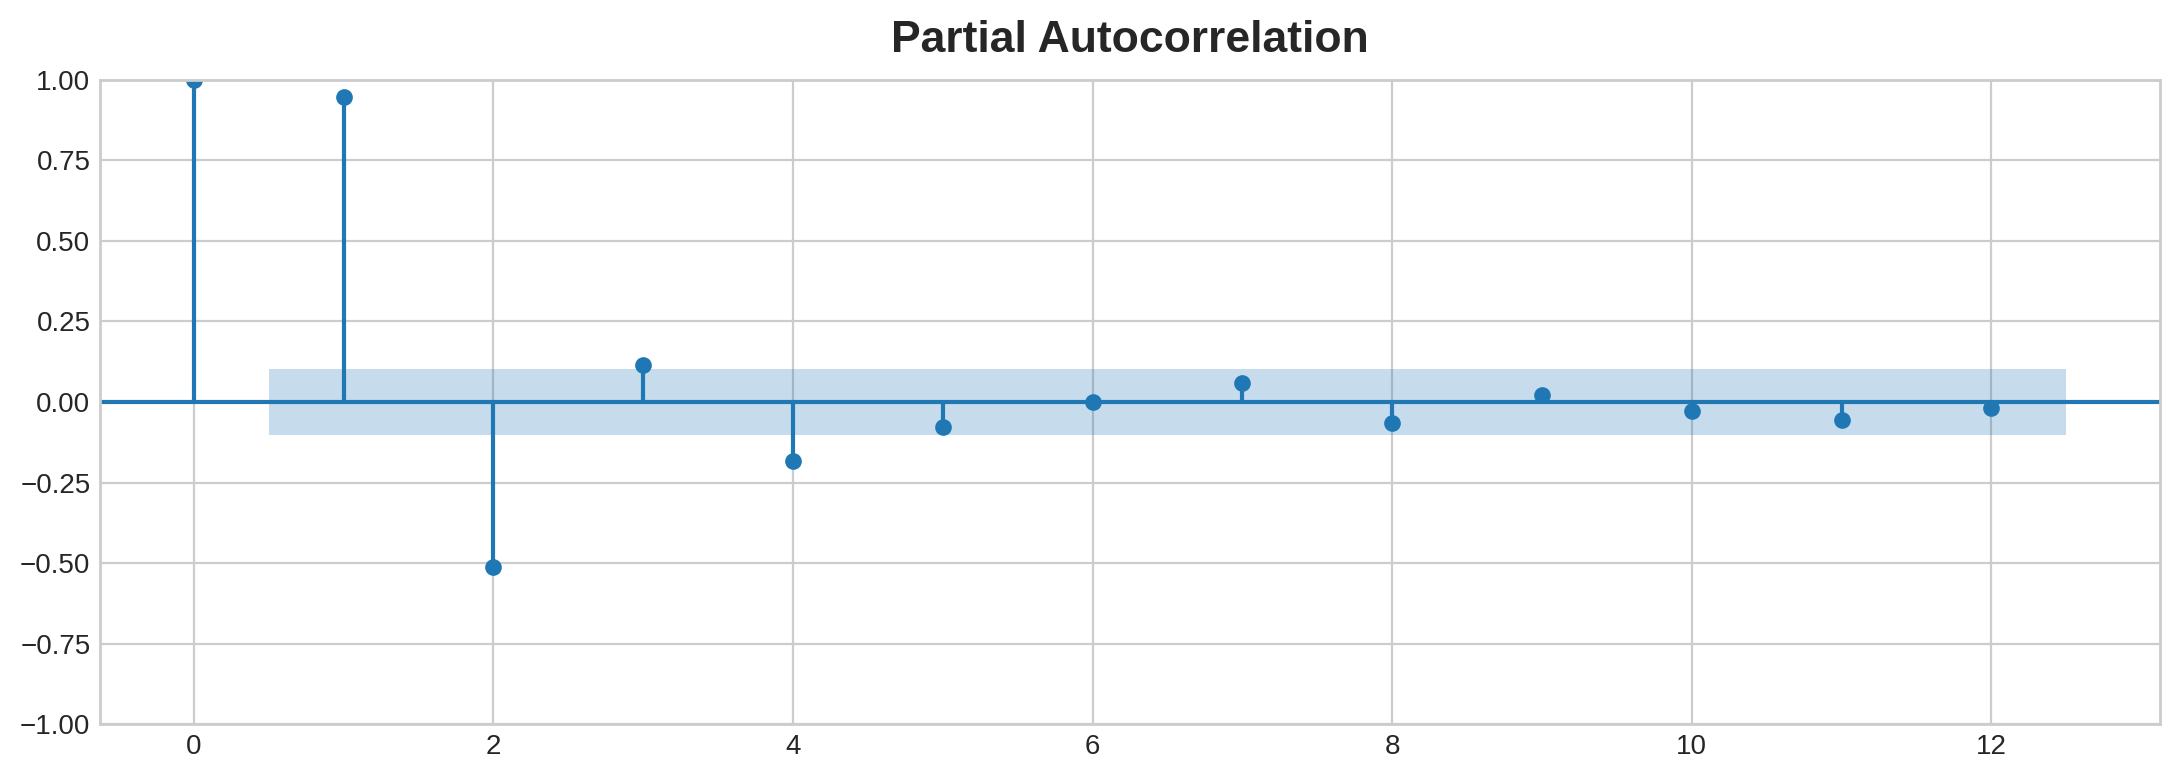

In [ ]:
_ = plot_lags(flu_trends.FluVisits, lags=12, nrows=2)
_ = plot_pacf(flu_trends.FluVisits, lags=12)

Tạo dữ liệu từ 4 lag đã chọn từ hình trên

In [ ]:
def make_lags(ts, lags):
    return pd.concat(
        {
            f'y_lag_{i}': ts.shift(i)
            for i in range(1, lags + 1)
        },
        axis=1)


X = make_lags(flu_trends.FluVisits, lags=4)
X = X.fillna(0.0)

In [ ]:
# Create target series and data splits
y = flu_trends.FluVisits.copy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=60, shuffle=False)

# Fit and predict
model = LinearRegression()  # `fit_intercept=True` since we didn't use DeterministicProcess
model.fit(X_train, y_train)
y_pred = pd.Series(model.predict(X_train), index=y_train.index)
y_fore = pd.Series(model.predict(X_test), index=y_test.index)

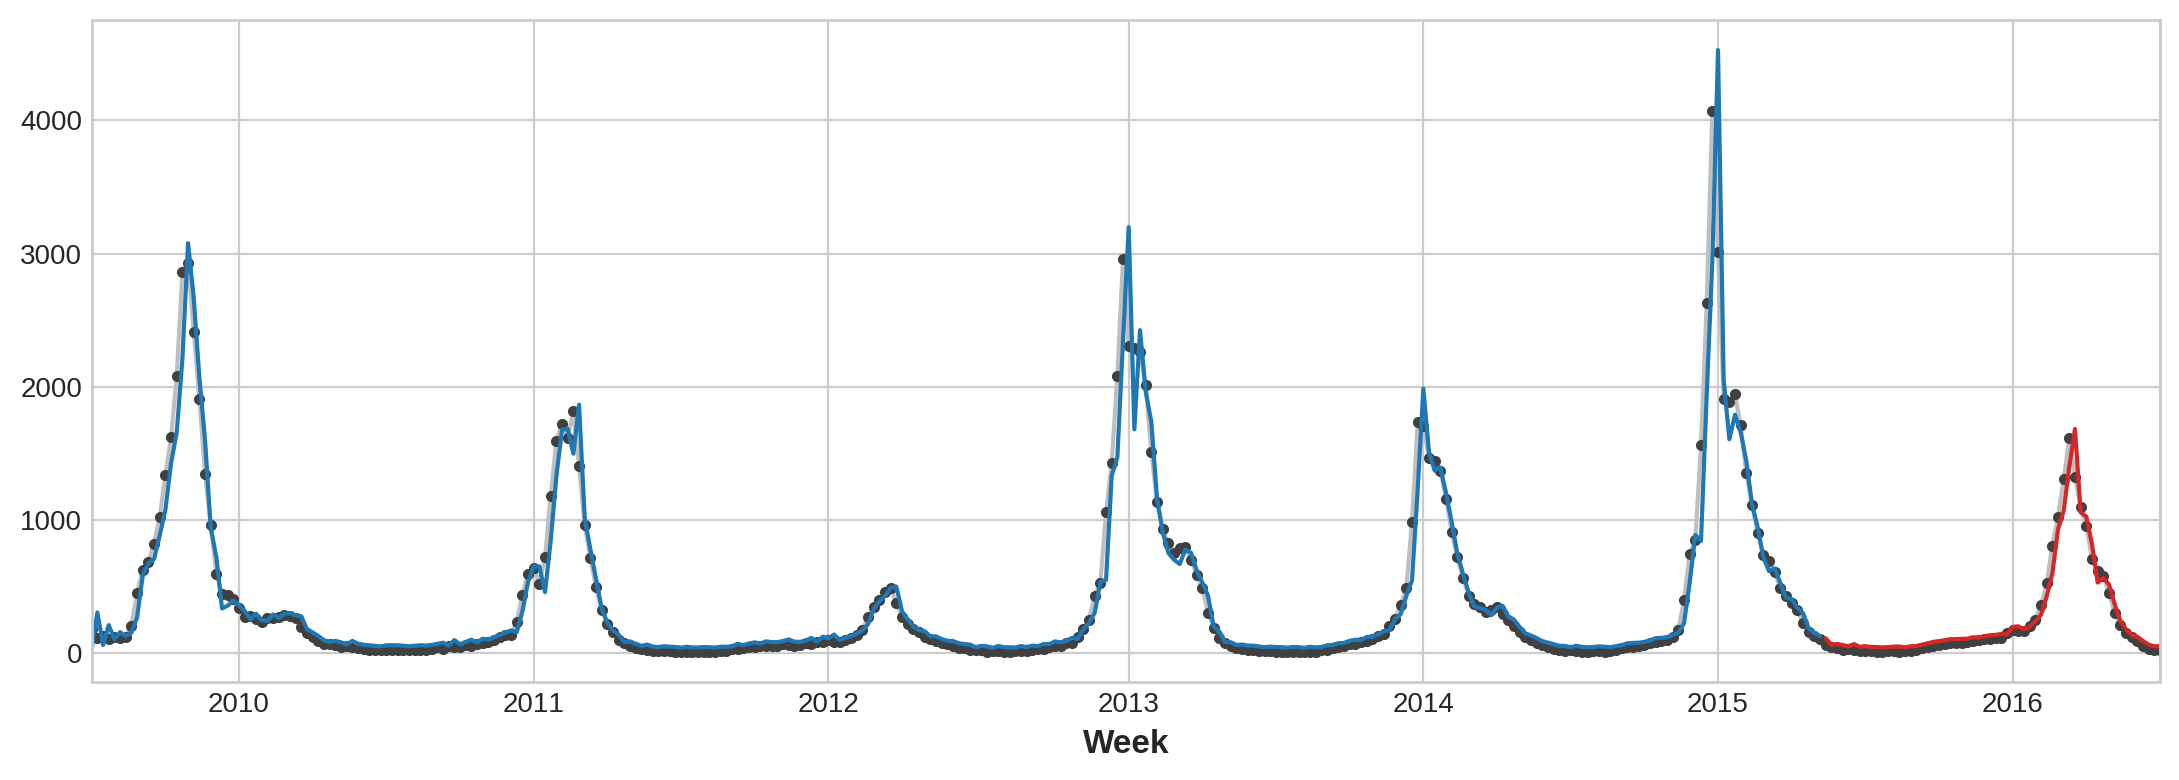

In [ ]:
ax = y_train.plot(**plot_params)
ax = y_test.plot(**plot_params)
ax = y_pred.plot(ax=ax)
_ = y_fore.plot(ax=ax, color='C3')

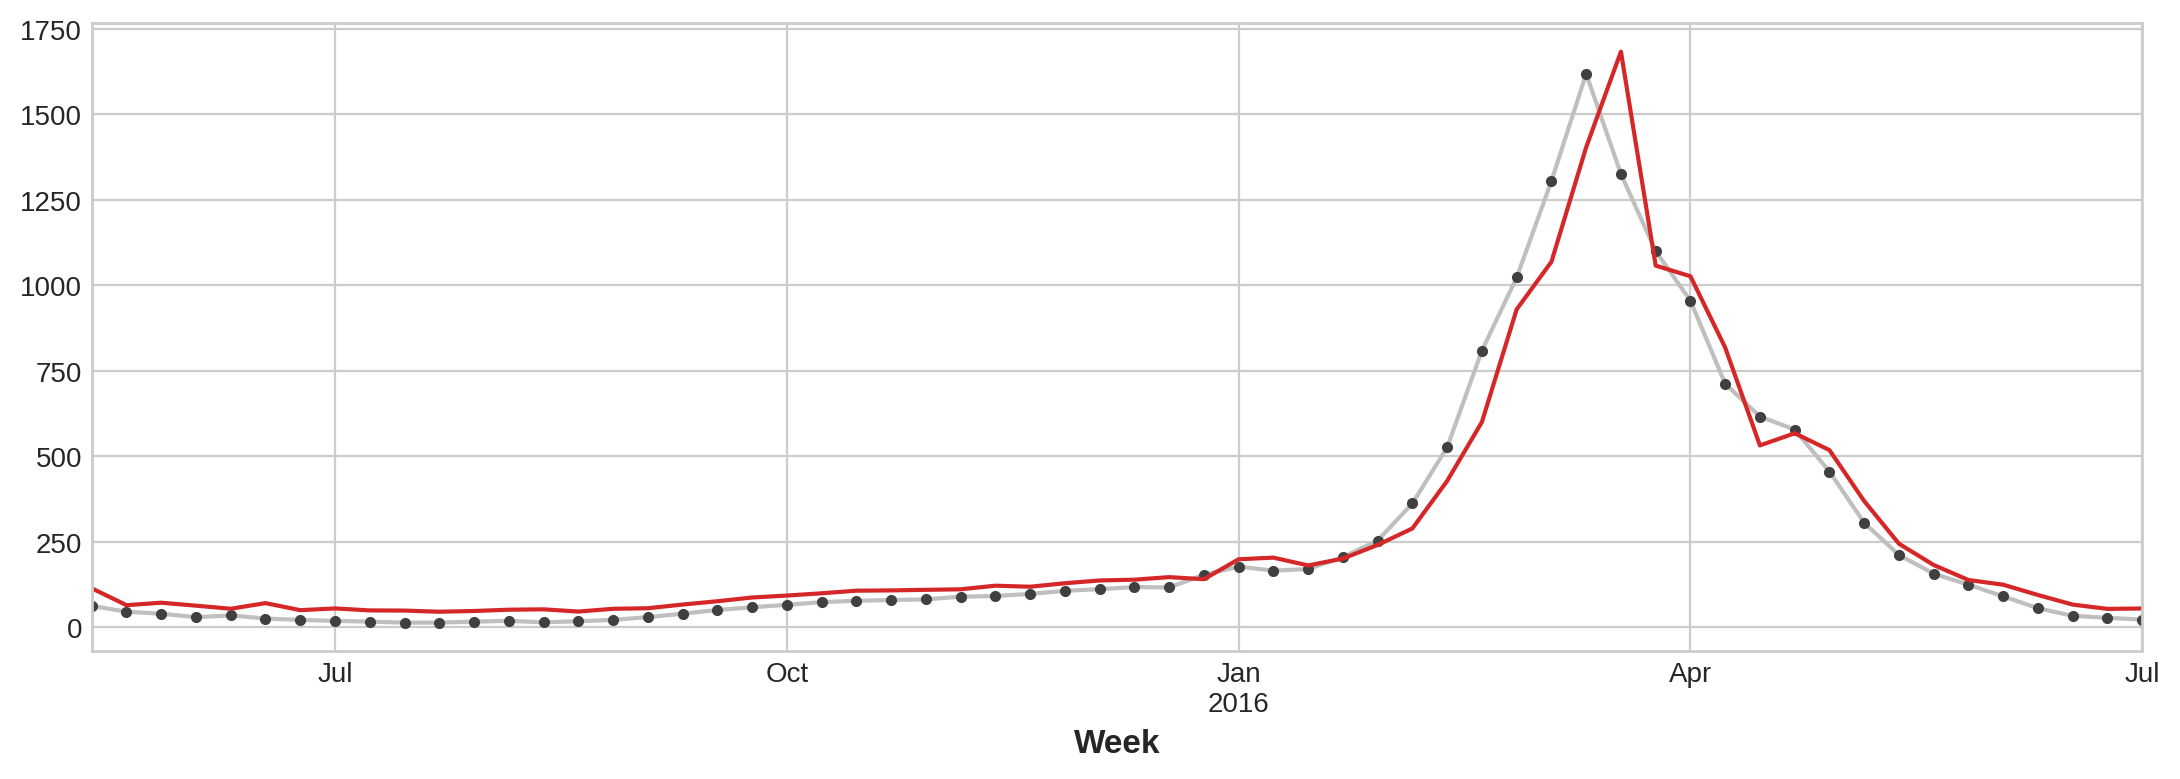

In [ ]:
ax = y_test.plot(**plot_params)
_ = y_fore.plot(ax=ax, color='C3')

Phần 2:  Dùng leading indicators – ví dụ số lượt tìm kiếm từ khóa như “flu cough” (khi người ta bắt đầu bị cúm là họ tìm trước khi đến gặp bác sĩ).

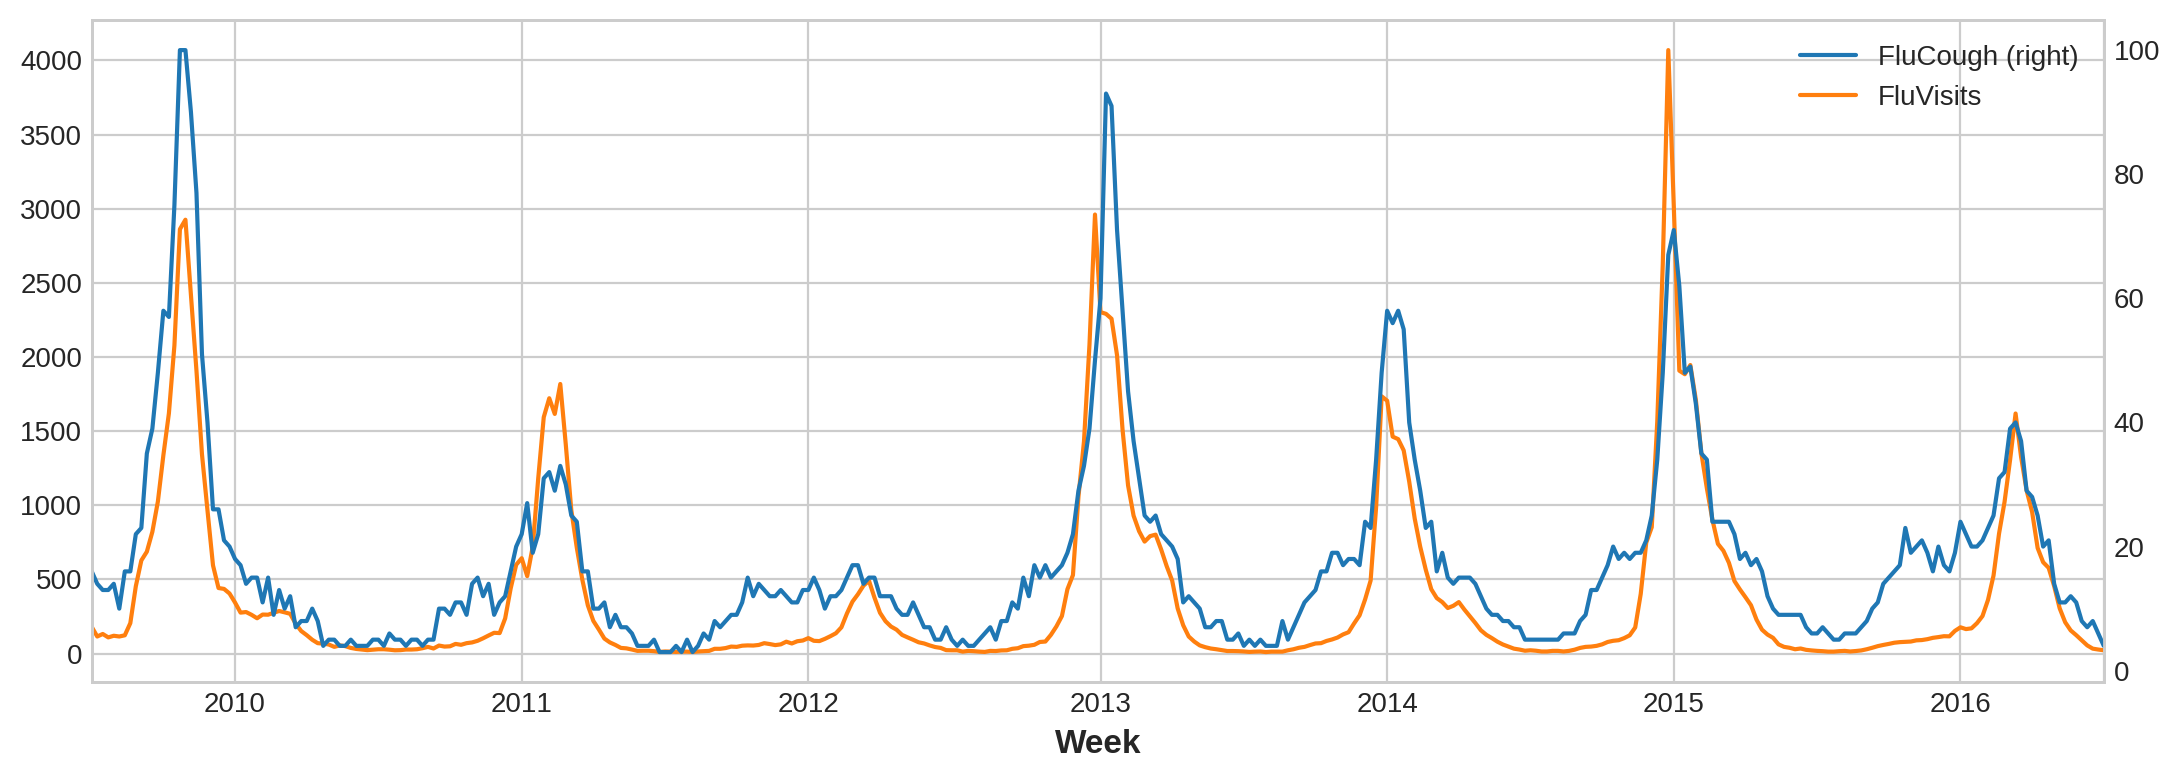

In [ ]:
ax = flu_trends.plot(
    y=["FluCough", "FluVisits"],
    secondary_y="FluCough",
)

In [ ]:
search_terms = ["FluContagious", "FluCough", "FluFever", "InfluenzaA", "TreatFlu", "IHaveTheFlu", "OverTheCounterFlu", "HowLongFlu"]

# Create three lags for each search term
X0 = make_lags(flu_trends[search_terms], lags=3)
X0.columns = [' '.join(col).strip() for col in X0.columns.values]

# Create four lags for the target, as before
X1 = make_lags(flu_trends['FluVisits'], lags=4)

# Combine to create the training data
X = pd.concat([X0, X1], axis=1).fillna(0.0)

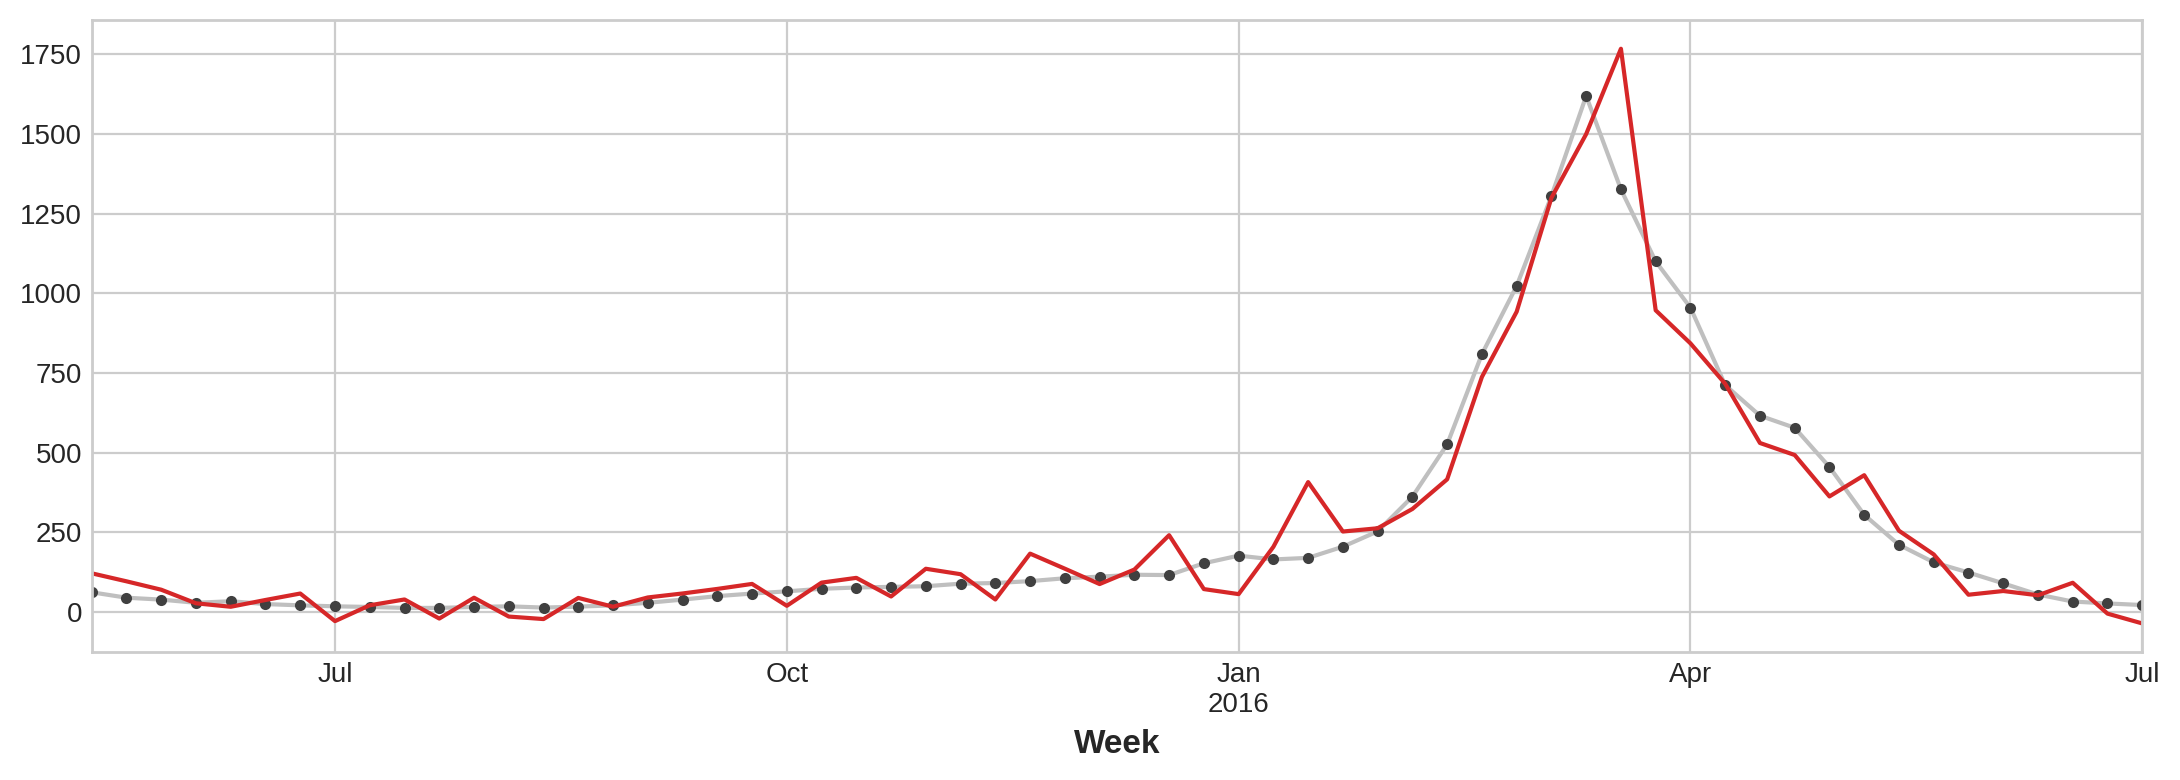

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=60, shuffle=False)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = pd.Series(model.predict(X_train), index=y_train.index)
y_fore = pd.Series(model.predict(X_test), index=y_test.index)

ax = y_test.plot(**plot_params)
_ = y_fore.plot(ax=ax, color='C3')

---

# Chương 5: Hybrid Models (Mô hình lai)





Hồi quy tuyến tính (linear regression) rất giỏi trong việc ngoại suy xu hướng (extrapolate trends), nhưng không thể học được các mối quan hệ phức tạp (interactions). XGBoost thì giỏi trong việc học các mối quan hệ phức tạp, nhưng lại không thể ngoại suy xu hướng. Trong bài học này, chúng ta sẽ học cách tạo ra các mô hình lai (hybrid) kết hợp các thuật toán học khác nhau sao cho điểm mạnh của mô hình này bù đắp điểm yếu của mô hình kia.



1. Các thành phần và phần dư (Components and Residuals)


Để thiết kế các mô hình lai hiệu quả, ta cần hiểu rõ hơn cách cấu tạo của chuỗi thời gian. Cho đến nay, ta đã học ba dạng phụ thuộc chính: xu hướng (trend), mùa vụ (seasons) và chu kỳ (cycles). Nhiều chuỗi thời gian có thể được mô tả khá chính xác bởi một mô hình cộng gồm ba thành phần này, cộng với một phần lỗi ngẫu nhiên không dự đoán được:

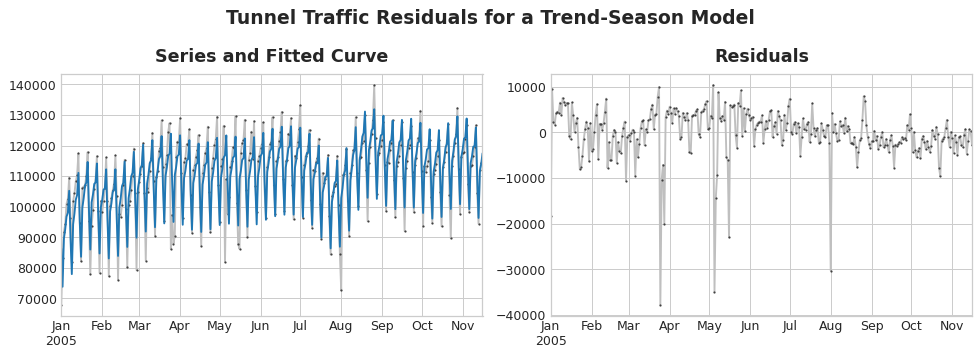

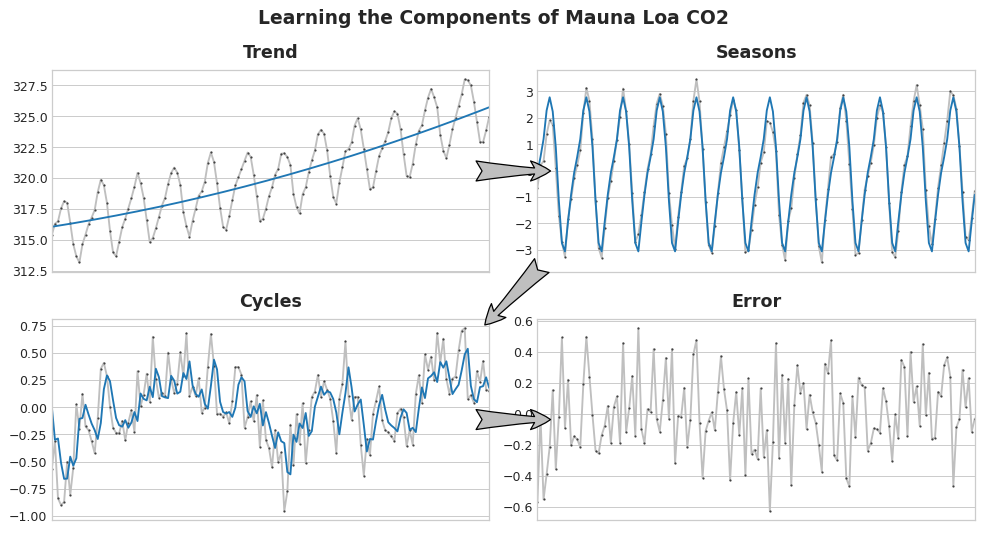

2. Hybrid Forecasting with Residuals


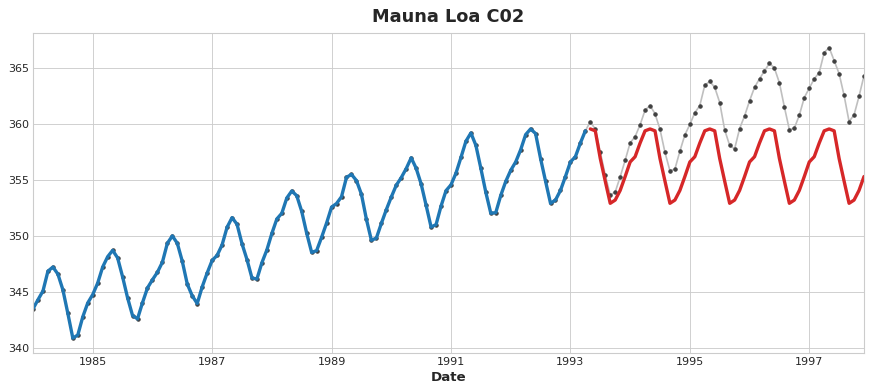

# Chương 6: Forecasting With Machine Learning
> Apply ML to any forecasting task with these four strategies.
